# Stock Market prediction using RNN

## Step 1: Load the Data

In [1]:
import pandas as pd

# Load the dataset from an Excel file, setting the 'Date' column as the index directly upon loading
df = pd.read_excel('pcanew12.xlsx', index_col='Date')
print(df)

# Display the first few rows of the DataFrame
# print(df.head())

                PCA1      PCA2      PCA3      PCA4      PCA5      PCA6  \
Date                                                                     
2019-02-01  0.025854  0.206921 -2.357195  0.312948  1.345098  1.811817   
2019-02-04 -0.190447  0.144136 -2.185900 -0.199318  2.237624  1.527158   
2019-02-05 -0.228298 -0.546170 -2.285652  0.703279 -1.076228  2.566852   
2019-02-06 -0.129954 -1.172557 -2.233071  0.795545  0.735523  2.037959   
2019-02-07 -0.273838 -0.456419 -2.276935  0.172038 -0.634727  2.432275   
...              ...       ...       ...       ...       ...       ...   
2024-02-19 -3.600438 -0.684541 -1.626597 -1.518915 -0.155605 -1.440669   
2024-02-20 -3.524437 -2.000172 -1.630796 -0.063524 -0.490662 -1.870123   
2024-02-21 -3.823275 -1.020753 -1.477378 -1.240633 -0.153504 -1.491296   
2024-02-22 -3.872456 -0.598434 -1.494158 -1.184903 -0.611001 -1.640454   
2024-02-23 -3.749761 -1.232184 -1.502232 -0.574405 -0.308679 -1.696622   

                PCA7      PCA8      P

In [2]:
import pandas as pd

# Load your CSV file
# df = pd.read_csv('your_file.csv')

# Replace -1 with 0 in the desired column
df['Returns direction'] = df['Returns direction'].replace(-1, 0)
# Save the updated DataFrame back to CSV
# df.to_csv('your_updated_file.csv', index=False)
print(df)

                PCA1      PCA2      PCA3      PCA4      PCA5      PCA6  \
Date                                                                     
2019-02-01  0.025854  0.206921 -2.357195  0.312948  1.345098  1.811817   
2019-02-04 -0.190447  0.144136 -2.185900 -0.199318  2.237624  1.527158   
2019-02-05 -0.228298 -0.546170 -2.285652  0.703279 -1.076228  2.566852   
2019-02-06 -0.129954 -1.172557 -2.233071  0.795545  0.735523  2.037959   
2019-02-07 -0.273838 -0.456419 -2.276935  0.172038 -0.634727  2.432275   
...              ...       ...       ...       ...       ...       ...   
2024-02-19 -3.600438 -0.684541 -1.626597 -1.518915 -0.155605 -1.440669   
2024-02-20 -3.524437 -2.000172 -1.630796 -0.063524 -0.490662 -1.870123   
2024-02-21 -3.823275 -1.020753 -1.477378 -1.240633 -0.153504 -1.491296   
2024-02-22 -3.872456 -0.598434 -1.494158 -1.184903 -0.611001 -1.640454   
2024-02-23 -3.749761 -1.232184 -1.502232 -0.574405 -0.308679 -1.696622   

                PCA7      PCA8      P

In [3]:
df['Returns direction'] = df['Returns direction'].astype(int)
print(df)

                PCA1      PCA2      PCA3      PCA4      PCA5      PCA6  \
Date                                                                     
2019-02-01  0.025854  0.206921 -2.357195  0.312948  1.345098  1.811817   
2019-02-04 -0.190447  0.144136 -2.185900 -0.199318  2.237624  1.527158   
2019-02-05 -0.228298 -0.546170 -2.285652  0.703279 -1.076228  2.566852   
2019-02-06 -0.129954 -1.172557 -2.233071  0.795545  0.735523  2.037959   
2019-02-07 -0.273838 -0.456419 -2.276935  0.172038 -0.634727  2.432275   
...              ...       ...       ...       ...       ...       ...   
2024-02-19 -3.600438 -0.684541 -1.626597 -1.518915 -0.155605 -1.440669   
2024-02-20 -3.524437 -2.000172 -1.630796 -0.063524 -0.490662 -1.870123   
2024-02-21 -3.823275 -1.020753 -1.477378 -1.240633 -0.153504 -1.491296   
2024-02-22 -3.872456 -0.598434 -1.494158 -1.184903 -0.611001 -1.640454   
2024-02-23 -3.749761 -1.232184 -1.502232 -0.574405 -0.308679 -1.696622   

                PCA7      PCA8      P


## Step 2:  Normalize the Data


In [4]:
# Import the StandardScaler from sklearn for data normalization
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler which will be used to normalize the features
scaler = StandardScaler()

# Here, all columns except 'returns_direction' are included
features = df.columns.difference(['Returns direction'])
print(len(features))

# Apply the StandardScaler to these columns to standardize them
df[features] = scaler.fit_transform(df[features])
print(df)

12
                PCA1      PCA2      PCA3      PCA4      PCA5      PCA6  \
Date                                                                     
2019-02-01  0.010991  0.096790 -1.316762  0.195066  1.076922  1.566805   
2019-02-04 -0.080964  0.067421 -1.221074 -0.124238  1.791502  1.320640   
2019-02-05 -0.097056 -0.255477 -1.276797  0.438366 -0.861657  2.219737   
2019-02-06 -0.055247 -0.548477 -1.247424  0.495876  0.588880  1.762366   
2019-02-07 -0.116416 -0.213495 -1.271927  0.107234 -0.508180  2.103359   
...              ...       ...       ...       ...       ...       ...   
2024-02-19 -1.530648 -0.320202 -0.908640 -0.946765 -0.124582 -1.245848   
2024-02-20 -1.498338 -0.935603 -0.910985 -0.039596 -0.392838 -1.617227   
2024-02-21 -1.625383 -0.477469 -0.825283 -0.773307 -0.122900 -1.289628   
2024-02-22 -1.646291 -0.279924 -0.834657 -0.738570 -0.489184 -1.418616   
2024-02-23 -1.594130 -0.576368 -0.839167 -0.358036 -0.247137 -1.467188   

                PCA7      PCA8    

# Step 3: Create Sequences

    RNNs require input data to be in sequences. Assuming a sequence length of n_steps, we can reshape our data accordingly.

In [5]:
# Import the numpy library, which is essential for numerical operations and handling arrays
import numpy as np

# Define a function to create sequences from the data suitable for RNN input
def create_sequences(data, n_steps):
    X, y = [], []  # Initialize empty lists to store the input sequences (X) and the target values (y)
    
    # Loop through the data starting from the end of the first sequence until the last possible sequence
    for i in range(n_steps, len(data)):
        # Append the features from (i-n_steps) to (i-1)
        X.append(data.iloc[i-n_steps:i, :-1].values)
#         print(X)
        
        # Append the target (last column) at time step i
        y.append(data.iloc[i, -1])
    
    # Convert the lists X and y into numpy arrays, which are more efficient and suitable for training RNNs
    return np.array(X), np.array(y)

# Define the number of steps to look back. This parameter defines how many past observations each sequence will consist of.
n_steps = 50  # 50 past observations

# Call the create_sequences function to generate input sequences (X) and target values (y) from the dataframe
X, y = create_sequences(df, n_steps)
print(X.shape)
print(y.shape)

# Assuming X and y are already defined using create_sequences function
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]
print(y_train.shape,'n')

# One hot encoding for labels
def one_hot_encode(labels, dimension=2):
    # Creating an array of zeros of shape (number of labels, number of categories)
    one_hot_labels = np.zeros((len(labels), dimension))

    one_hot_labels[np.arange(len(labels)), labels] = 1
    return one_hot_labels

# Apply one-hot encoding
y_train_encoded = one_hot_encode(y_train)
y_test_encoded = one_hot_encode(y_test)

# print(features)
print("Number of features:", len(features))

# Print the shape of X to see if it matches the expected shape
print("Shape of input data (X):", X.shape)

(1200, 50, 12)
(1200,)
(960,) n
Number of features: 12
Shape of input data (X): (1200, 50, 12)


## Step 4: Build the RNN Model

    We will use a simple RNN for the model architecture.


In [6]:
# rnn model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Nadam

def create_rnn_model(n_steps, num_features, num_rnn_layers=2, rnn_units=[50, 50], 
                     rnn_activation='tanh', output_units=2, output_activation='softmax',
                     optimizer='adam', learning_rate=0.01, momentum=0.0, nesterov=False):
    """
    Creates an RNN model with specified configurations and a flexible choice of optimizer.
    
    Parameters:
    - n_steps: int, number of time steps in the input features.
    - num_features: int, number of features in each input sample.
    - num_rnn_layers: int, number of RNN layers in the model.
    - rnn_units: list of ints, number of units in each RNN layer.
    - rnn_activation: str, activation function to use in RNN layers.
    - output_units: int, number of units in the output layer.
    - output_activation: str, activation function to use in the output layer.
    - optimizer: str, optimizer name (sgd, rmsprop, adam, nadam).
    - learning_rate: float, learning rate for the optimizer.
    - momentum: float, momentum coefficient for some optimizers.
    - nesterov: bool, use Nesterov momentum for applicable optimizers.
    
    Returns:
    - A compiled Keras Sequential model.
    """
    model = Sequential()
    # Add RNN layers
    for i in range(num_rnn_layers):
        if i == 0:
            # First layer needs to specify input shape
            model.add(SimpleRNN(rnn_units[i], activation=rnn_activation, 
                                input_shape=(n_steps, num_features), return_sequences=(i < num_rnn_layers - 1)))
        else:
            # Subsequent layers
            model.add(SimpleRNN(rnn_units[i], activation=rnn_activation, return_sequences=(i < num_rnn_layers - 1)))
    
    # Add output layer
    model.add(Dense(output_units, activation=output_activation))
    
    # Select the optimizer
    if optimizer.lower() == 'sgd' or optimizer.lower() == 'mgd':
        opt = SGD(learning_rate=learning_rate, momentum=momentum, nesterov=nesterov)
    elif optimizer.lower() == 'rmsprop':
        opt = RMSprop(learning_rate=learning_rate, momentum=momentum)
    elif optimizer.lower() == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer.lower() == 'nadam':
        opt = Nadam(learning_rate=learning_rate)
    else:
        raise ValueError("Unsupported optimizer: {}. Use 'sgd', 'mgd', 'rmsprop', 'adam', or 'nadam'.".format(optimizer))
    
    # Compile the model
    model.compile(optimizer=opt, loss='mse', metrics=['accuracy'])
    
    return model

# -ac_sigmoid-epc_10-n_steps-30batch_size32optimizernadam
# Example usage
model = create_rnn_model(n_steps=30, num_features=len(features), num_rnn_layers=3, 
                         rnn_units=[32, 64, 128], rnn_activation='sigmoid', output_units=2, 
                         output_activation='sigmoid', optimizer='nadam', learning_rate=0.01)
model.summary()


C:\Users\Partha Sakha Paul\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 30, 32)              │           1,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 30, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 128)                 │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,610 (127.38 KB)

 Trainable params: 32,610 (127.38 KB)

 Non-trainable params: 0 (0.00 B)

## Step 5: Train the Model


In [7]:
# Fit the model
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - accuracy: 0.5133 - loss: 0.2865 - val_accuracy: 0.5000 - val_loss: 0.2478
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.5762 - loss: 0.2348 - val_accuracy: 0.8333 - val_loss: 0.1387
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.7335 - loss: 0.1718 - val_accuracy: 0.7812 - val_loss: 0.1519
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.7505 - loss: 0.1686 - val_accuracy: 0.7917 - val_loss: 0.1458
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7683 - loss: 0.1622 - val_accuracy: 0.8646 - val_loss: 0.1211
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7524 - loss: 0.1716 - val_accuracy: 0.7812 - val_loss: 0.1465
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.7733 - loss: 0.1632 - val_accuracy: 0.8021 - val_loss: 0.1382
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8045 - loss: 0.1424 - val_accuracy: 0.8438 - v

In [8]:
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test Accuracy: {accuracy*100:.2f}%")

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8653 - loss: 0.0893
Test Accuracy: 87.50%


In [12]:
# Example: Predicting the next step using the latest `n_steps` data points
# print(X)
latest_sequence = X_test[:]  # Assuming X is your full data set prepared for RNN input
print(y_test)
print(latest_sequence.shape)
predicted_direction = model.predict(latest_sequence)
predicted_class = np.argmax(predicted_direction, axis=1)
print("Predicted Class:\n", predicted_class)

[1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1
 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0
 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 1 1
 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1
 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0
 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0]
(240, 50, 12)
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Class:
 [1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1
 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0
 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1
 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1
 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 

In [13]:
from sklearn.metrics import mean_squared_error

# Given that y_test and predicted_class are already defined:
mse = mean_squared_error(y_test, predicted_class)
print("Mean Squared Error between y_test and predicted_class:", mse)


Mean Squared Error between y_test and predicted_class: 0.125


In [14]:
# Create DataFrame
df = pd.DataFrame({
    'y_pred': predicted_class,
    'y_test': y_test
})

# Save to CSV
df.to_csv('predictions_vs_actuals_new.csv', index=False)

print("CSV file has been created.")


CSV file has been created.


In [15]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


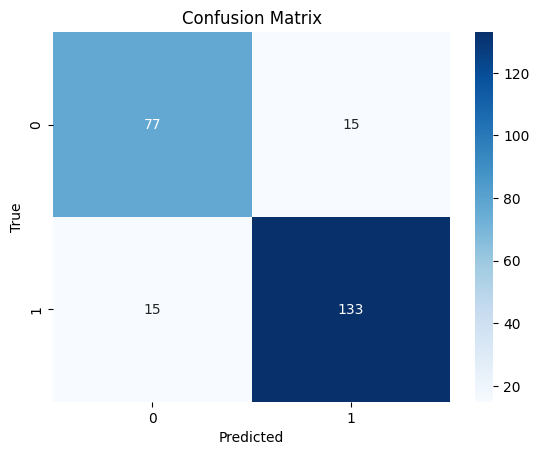

In [16]:
cm = confusion_matrix(y_test, predicted_class)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [17]:
print(classification_report(y_test, predicted_class))


              precision    recall  f1-score   support

           0       0.84      0.84      0.84        92
           1       0.90      0.90      0.90       148

    accuracy                           0.88       240
   macro avg       0.87      0.87      0.87       240
weighted avg       0.88      0.88      0.88       240



In [11]:
accuracy = accuracy_score(y_test, predicted_class)
print(f"Model Accuracy: {accuracy*100:.2f}%")


NameError: name 'accuracy_score' is not defined

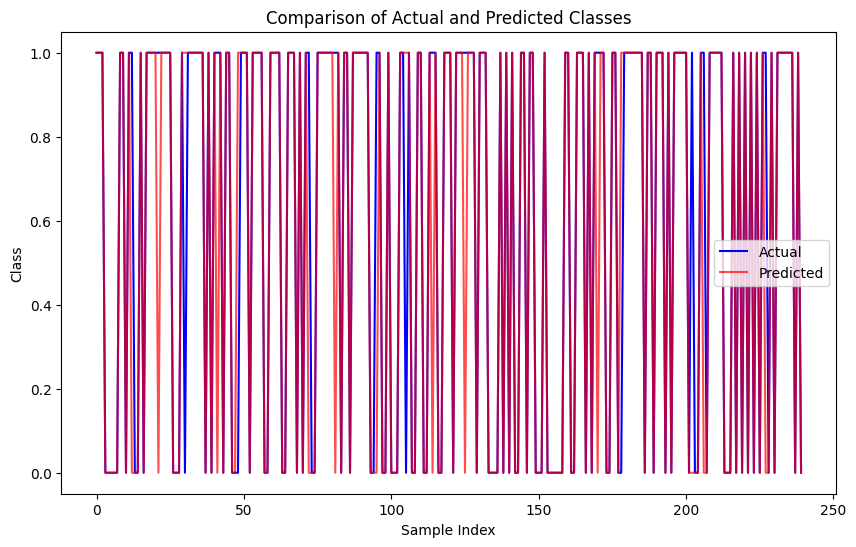

In [89]:
plt.figure(figsize=(10, 6))
plt.plot(y_test[:245], 'b', label='Actual')
plt.plot(predicted_class[:245], 'r', alpha=0.7, label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Comparison of Actual and Predicted Classes')
plt.legend()
plt.show()


In [72]:
import wandb
import numpy as np
from types import SimpleNamespace
import random

key = input('Enter your API:')
wandb.login(key=key)  #25c2257eaf6c22aa056893db14da4ee2bf0a531a

Enter your API:25c2257eaf6c22aa056893db14da4ee2bf0a531a


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\Partha Sakha Paul\.netrc


True

In [73]:
sweep_config = {
    'method': 'bayes',   #for bayes:
                            #ref: https://wandb.ai/wandb_fc/articles/reports/What-Is-Bayesian-Hyperparameter-Optimization-With-Tutorial---Vmlldzo1NDQyNzcw
    'name' : 'sweep final rnn finalllllll',
    'metric': {
      'name': 'val_accuracy',
      'goal': 'maximize'
    },
    'parameters': {
        'epochs': {
            'values': [5,10]
        },
        'n_steps':{
            'values':[30,40,50,60,70,80]
        },
        'rnn_activation': {
            'values': ['relu','tanh','sigmoid']
        },
        'batch_size': {
            'values': [32,64,128]
        },
        'optimizer':{
            'values':['sgd', 'mgd', 'rmsprop', 'adam', 'nadam']
        }
    }
}

sweep_id = wandb.sweep(sweep=sweep_config, project='modelling_workshop')

Create sweep with ID: 67s2bhxr
Sweep URL: https://wandb.ai/parthasakhapaul/modelling_workshop/sweeps/67s2bhxr


In [74]:
def main():


    with wandb.init() as run:

        run_name="-ac_"+wandb.config.rnn_activation+"-epc_"+str(wandb.config.epochs)+"-n_steps-"+str(wandb.config.n_steps)+'batch_size'+str(wandb.config.batch_size)+'optimizer'+wandb.config.optimizer
        wandb.run.name=run_name
        model = create_rnn_model(n_steps=wandb.config.n_steps, num_features=12, num_rnn_layers=2, 
                         rnn_units=[50, 50], rnn_activation=wandb.config.rnn_activation, 
                         output_units=2, output_activation='softmax', 
                         optimizer=wandb.config.optimizer, learning_rate=0.01)
        history = model.fit(X_train, y_train_encoded, 
                            epochs=wandb.config.epochs,
                            batch_size=wandb.config.batch_size,
                            validation_split=0.2
                            )

        
        # Log the accuracy and other metrics after each epoch
        for epoch in range(wandb.config.epochs):
            wandb.log({"accuracy": history.history['accuracy'][epoch], 
                       "val_accuracy": history.history['val_accuracy'][epoch],
                       "loss": history.history['loss'][epoch],
                       "val_loss": history.history['val_loss'][epoch]}, step=epoch)



wandb.agent(sweep_id, function=main,count=100) # calls main function for count number of times.
wandb.finish()

wandb: Agent Starting Run: uif6jomy with config:
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	n_steps: 80
wandb: 	optimizer: nadam
wandb: 	rnn_activation: relu


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.5461 - loss: 0.2738 - val_accuracy: 0.7344 - val_loss: 0.1928
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7932 - loss: 0.1563 - val_accuracy: 0.7708 - val_loss: 0.1624
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8593 - loss: 0.1157 - val_accuracy: 0.7760 - val_loss: 0.1571
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8794 - loss: 0.0958 - val_accuracy: 0.7812 - val_loss: 0.1572
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9294 - loss: 0.0674 - val_accuracy: 0.8021 - val_loss: 0.1521
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9408 - loss: 0.0544 - val_accuracy: 0.8281 - val_loss: 0.1343
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9584 - loss: 0.0352 - val_accuracy: 0.8021 - val_loss: 0.1410
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9701 - loss: 0.0304 - val_accuracy: 0.8594 - v

accuracy,▁▅▆▆▇▇████
loss,█▅▄▃▃▂▁▁▁▁
val_accuracy,▁▃▃▄▅▆▅█▆▄
val_loss,█▅▅▅▅▃▄▁▂▅
accuracy,0.97396
loss,0.02482
val_accuracy,0.78125
val_loss,0.15506


wandb: Agent Starting Run: ixdm8bma with config:
wandb: 	batch_size: 128
wandb: 	epochs: 5
wandb: 	n_steps: 60
wandb: 	optimizer: mgd
wandb: 	rnn_activation: sigmoid


Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 154ms/step - accuracy: 0.5275 - loss: 0.2877 - val_accuracy: 0.5052 - val_loss: 0.2926
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5509 - loss: 0.2664 - val_accuracy: 0.5052 - val_loss: 0.2802
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5331 - loss: 0.2638 - val_accuracy: 0.5052 - val_loss: 0.2713
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5405 - loss: 0.2568 - val_accuracy: 0.5052 - val_loss: 0.2651
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5592 - loss: 0.2480 - val_accuracy: 0.5052 - val_loss: 0.2609


accuracy,▁▁▁▁▁
loss,█▅▃▂▁
val_accuracy,▁▁▁▁▁
val_loss,█▅▃▂▁
accuracy,0.54167
loss,0.25205
val_accuracy,0.50521
val_loss,0.26086


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 38utlbjy with config:
wandb: 	batch_size: 128
wandb: 	epochs: 10
wandb: 	n_steps: 60
wandb: 	optimizer: sgd
wandb: 	rnn_activation: sigmoid


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - accuracy: 0.4677 - loss: 0.2522 - val_accuracy: 0.5104 - val_loss: 0.2509
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5121 - loss: 0.2503 - val_accuracy: 0.4948 - val_loss: 0.2516
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5370 - loss: 0.2499 - val_accuracy: 0.4844 - val_loss: 0.2523
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5385 - loss: 0.2495 - val_accuracy: 0.4844 - val_loss: 0.2529
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5367 - loss: 0.2498 - val_accuracy: 0.5000 - val_loss: 0.2534
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5337 - loss: 0.2493 - val_accuracy: 0.5000 - val_loss: 0.2538
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5363 - loss: 0.2490 - val_accuracy: 0.5052 - val_loss: 0.2541
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5426 - loss: 0.2489 - val_accuracy: 0.5052 - val_loss: 0.2544

accuracy,▁▅▇██▇▇▇█▇
loss,█▅▄▃▂▂▁▁▁▁
val_accuracy,█▄▁▁▅▅▇▇▇▇
val_loss,▁▂▄▅▆▆▇▇██
accuracy,0.53906
loss,0.24873
val_accuracy,0.50521
val_loss,0.25473


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 000q9dcm with config:
wandb: 	batch_size: 128
wandb: 	epochs: 10
wandb: 	n_steps: 80
wandb: 	optimizer: nadam
wandb: 	rnn_activation: relu


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step - accuracy: 0.5156 - loss: 0.2777 - val_accuracy: 0.6510 - val_loss: 0.2105
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7515 - loss: 0.1785 - val_accuracy: 0.6927 - val_loss: 0.1952
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7929 - loss: 0.1508 - val_accuracy: 0.7292 - val_loss: 0.1997
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8314 - loss: 0.1248 - val_accuracy: 0.6771 - val_loss: 0.2091
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8982 - loss: 0.0886 - val_accuracy: 0.7083 - val_loss: 0.1875
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9179 - loss: 0.0694 - val_accuracy: 0.7292 - val_loss: 0.1796
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9523 - loss: 0.0462 - val_accuracy: 0.7448 - val_loss: 0.1896
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9764 - loss: 0.0299 - val_accuracy: 0.7448 - val_loss: 0.1947

accuracy,▁▄▅▆▇▇██▇█
loss,█▅▅▄▃▂▂▁▂▁
val_accuracy,▁▄▇▃▅▇██▆▃
val_loss,▇▄▅▇▃▁▃▄▄█
accuracy,0.96745
loss,0.02991
val_accuracy,0.67708
val_loss,0.21588


wandb: Agent Starting Run: kg1k14qc with config:
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	n_steps: 70
wandb: 	optimizer: nadam
wandb: 	rnn_activation: relu


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.5947 - loss: 0.2424 - val_accuracy: 0.7812 - val_loss: 0.1685
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7726 - loss: 0.1550 - val_accuracy: 0.7865 - val_loss: 0.1464
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8278 - loss: 0.1266 - val_accuracy: 0.8125 - val_loss: 0.1468
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9061 - loss: 0.0786 - val_accuracy: 0.7760 - val_loss: 0.1552
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9378 - loss: 0.0542 - val_accuracy: 0.7917 - val_loss: 0.1620
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9482 - loss: 0.0488 - val_accuracy: 0.7292 - val_loss: 0.1908
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9598 - loss: 0.0376 - val_accuracy: 0.7604 - val_loss: 0.1785
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9850 - loss: 0.0229 - val_accuracy: 0.7188 - v

accuracy,▁▄▅▆▇▇████
loss,█▆▄▃▂▂▂▁▁▁
val_accuracy,▆▆█▆▇▂▅▂▁▄
val_loss,▃▁▁▂▃▅▄▇█▄
accuracy,0.97786
loss,0.02119
val_accuracy,0.75
val_loss,0.18035


wandb: Agent Starting Run: 0guxrk7j with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	n_steps: 80
wandb: 	optimizer: nadam
wandb: 	rnn_activation: relu


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - accuracy: 0.6271 - loss: 0.2375 - val_accuracy: 0.7396 - val_loss: 0.1729
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7818 - loss: 0.1526 - val_accuracy: 0.7344 - val_loss: 0.1867
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8200 - loss: 0.1240 - val_accuracy: 0.8021 - val_loss: 0.1313
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8948 - loss: 0.0862 - val_accuracy: 0.8438 - val_loss: 0.1133
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8965 - loss: 0.0799 - val_accuracy: 0.7917 - val_loss: 0.1546
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9016 - loss: 0.0709 - val_accuracy: 0.8229 - val_loss: 0.1387
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9315 - loss: 0.0563 - val_accuracy: 0.8438 - val_loss: 0.1108
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9373 - loss: 0.0563 - val_accuracy: 0.7708 - v

accuracy,▁▄▅▆▆▇▇███
loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▃▃▆█▆▇█▅▅▁
val_loss,▆▇▃▁▄▃▁▅▄█
accuracy,0.94401
loss,0.04466
val_accuracy,0.69271
val_loss,0.20158


wandb: Agent Starting Run: iitxn9mf with config:
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	n_steps: 80
wandb: 	optimizer: nadam
wandb: 	rnn_activation: relu


Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - accuracy: 0.5474 - loss: 0.2848 - val_accuracy: 0.6510 - val_loss: 0.2123
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7945 - loss: 0.1557 - val_accuracy: 0.7135 - val_loss: 0.1905
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8162 - loss: 0.1398 - val_accuracy: 0.7135 - val_loss: 0.1850
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8750 - loss: 0.1018 - val_accuracy: 0.7708 - val_loss: 0.1532
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9173 - loss: 0.0737 - val_accuracy: 0.8229 - val_loss: 0.1315


accuracy,▁▅▆▇█
loss,█▅▃▂▁
val_accuracy,▁▄▄▆█
val_loss,█▆▆▃▁
accuracy,0.91276
loss,0.07321
val_accuracy,0.82292
val_loss,0.13146


wandb: Agent Starting Run: 7jraqxuh with config:
wandb: 	batch_size: 128
wandb: 	epochs: 5
wandb: 	n_steps: 80
wandb: 	optimizer: nadam
wandb: 	rnn_activation: relu


Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - accuracy: 0.5319 - loss: 0.2930 - val_accuracy: 0.6927 - val_loss: 0.2089
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7457 - loss: 0.1848 - val_accuracy: 0.7500 - val_loss: 0.1852
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7857 - loss: 0.1495 - val_accuracy: 0.7292 - val_loss: 0.1787
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8375 - loss: 0.1161 - val_accuracy: 0.7396 - val_loss: 0.1661
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8815 - loss: 0.0970 - val_accuracy: 0.7396 - val_loss: 0.1785


accuracy,▁▅▆▇█
loss,█▄▃▂▁
val_accuracy,▁█▅▇▇
val_loss,█▄▃▁▃
accuracy,0.88672
loss,0.09389
val_accuracy,0.73958
val_loss,0.17854


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 6howjpz6 with config:
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	n_steps: 80
wandb: 	optimizer: nadam
wandb: 	rnn_activation: relu


Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - accuracy: 0.5471 - loss: 0.2534 - val_accuracy: 0.6667 - val_loss: 0.2176
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7686 - loss: 0.1656 - val_accuracy: 0.7135 - val_loss: 0.1729
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8638 - loss: 0.1102 - val_accuracy: 0.7552 - val_loss: 0.1594
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9124 - loss: 0.0788 - val_accuracy: 0.7292 - val_loss: 0.1937
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9240 - loss: 0.0679 - val_accuracy: 0.8281 - val_loss: 0.1334


accuracy,▁▅▆██
loss,█▅▃▂▁
val_accuracy,▁▃▅▄█
val_loss,█▄▃▆▁
accuracy,0.91797
loss,0.06721
val_accuracy,0.82812
val_loss,0.13343


wandb: Agent Starting Run: ic4ej86c with config:
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	n_steps: 70
wandb: 	optimizer: nadam
wandb: 	rnn_activation: relu


Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - accuracy: 0.5989 - loss: 0.2497 - val_accuracy: 0.7812 - val_loss: 0.1759
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7615 - loss: 0.1642 - val_accuracy: 0.7812 - val_loss: 0.1672
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8521 - loss: 0.1179 - val_accuracy: 0.7292 - val_loss: 0.1702
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8811 - loss: 0.0948 - val_accuracy: 0.7708 - val_loss: 0.1570
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9423 - loss: 0.0553 - val_accuracy: 0.7344 - val_loss: 0.1721


accuracy,▁▄▆▇█
loss,█▅▄▂▁
val_accuracy,██▁▇▂
val_loss,█▅▆▁▇
accuracy,0.92708
loss,0.06431
val_accuracy,0.73438
val_loss,0.17212


wandb: Agent Starting Run: oa8vrdsy with config:
wandb: 	batch_size: 128
wandb: 	epochs: 5
wandb: 	n_steps: 80
wandb: 	optimizer: nadam
wandb: 	rnn_activation: relu


Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 158ms/step - accuracy: 0.5389 - loss: 0.2712 - val_accuracy: 0.7135 - val_loss: 0.2044
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7394 - loss: 0.1818 - val_accuracy: 0.7604 - val_loss: 0.1790
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8311 - loss: 0.1417 - val_accuracy: 0.7500 - val_loss: 0.1709
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8505 - loss: 0.1129 - val_accuracy: 0.7500 - val_loss: 0.1585
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8845 - loss: 0.0943 - val_accuracy: 0.7448 - val_loss: 0.1589


accuracy,▁▅▆▇█
loss,█▅▃▂▁
val_accuracy,▁█▆▆▆
val_loss,█▄▃▁▁
accuracy,0.89583
loss,0.08813
val_accuracy,0.74479
val_loss,0.15892


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 8prpzynt with config:
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	n_steps: 80
wandb: 	optimizer: nadam
wandb: 	rnn_activation: relu


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.5659 - loss: 0.2582 - val_accuracy: 0.7656 - val_loss: 0.1815
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7769 - loss: 0.1665 - val_accuracy: 0.7760 - val_loss: 0.1461
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8508 - loss: 0.1186 - val_accuracy: 0.8490 - val_loss: 0.1108
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8566 - loss: 0.0959 - val_accuracy: 0.7969 - val_loss: 0.1296
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9423 - loss: 0.0589 - val_accuracy: 0.8438 - val_loss: 0.1248
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9434 - loss: 0.0531 - val_accuracy: 0.8438 - val_loss: 0.1203
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9594 - loss: 0.0382 - val_accuracy: 0.8750 - val_loss: 0.0970
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9489 - loss: 0.0421 - val_accuracy: 0.8177 - v

accuracy,▁▄▅▆▇▇▇▇██
loss,█▅▄▃▂▂▂▂▁▁
val_accuracy,▁▂▆▃▆▆█▄▅▅
val_loss,█▅▂▄▃▃▁▃▃▃
accuracy,0.97526
loss,0.02292
val_accuracy,0.83333
val_loss,0.12449


wandb: Agent Starting Run: lpn9jw5m with config:
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	n_steps: 80
wandb: 	optimizer: adam
wandb: 	rnn_activation: relu


Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.5883 - loss: 0.2621 - val_accuracy: 0.7865 - val_loss: 0.1579
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7636 - loss: 0.1669 - val_accuracy: 0.8385 - val_loss: 0.1285
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8115 - loss: 0.1315 - val_accuracy: 0.7865 - val_loss: 0.1344
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8362 - loss: 0.1153 - val_accuracy: 0.8385 - val_loss: 0.1179
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8900 - loss: 0.0847 - val_accuracy: 0.7865 - val_loss: 0.1687


accuracy,▁▄▆▇█
loss,█▅▃▂▁
val_accuracy,▁█▁█▁
val_loss,▇▂▃▁█
accuracy,0.88411
loss,0.08912
val_accuracy,0.78646
val_loss,0.16872


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: c3te5dr0 with config:
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	n_steps: 80
wandb: 	optimizer: adam
wandb: 	rnn_activation: relu


Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.6521 - loss: 0.2287 - val_accuracy: 0.6927 - val_loss: 0.2012
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7850 - loss: 0.1586 - val_accuracy: 0.7240 - val_loss: 0.1779
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8343 - loss: 0.1263 - val_accuracy: 0.7812 - val_loss: 0.1620
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8816 - loss: 0.0837 - val_accuracy: 0.7135 - val_loss: 0.1919
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9099 - loss: 0.0741 - val_accuracy: 0.7135 - val_loss: 0.2217


accuracy,▁▄▆▇█
loss,█▅▃▂▁
val_accuracy,▁▃█▃▃
val_loss,▆▃▁▅█
accuracy,0.90495
loss,0.07506
val_accuracy,0.71354
val_loss,0.2217


wandb: Agent Starting Run: iyiqxr8g with config:
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	n_steps: 80
wandb: 	optimizer: nadam
wandb: 	rnn_activation: relu


Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.6168 - loss: 0.2495 - val_accuracy: 0.6979 - val_loss: 0.2145
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7831 - loss: 0.1559 - val_accuracy: 0.6667 - val_loss: 0.1930
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8318 - loss: 0.1153 - val_accuracy: 0.7135 - val_loss: 0.1833
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8709 - loss: 0.0943 - val_accuracy: 0.7708 - val_loss: 0.1644
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9145 - loss: 0.0636 - val_accuracy: 0.7760 - val_loss: 0.1399


accuracy,▁▅▆▇█
loss,█▅▃▂▁
val_accuracy,▃▁▄██
val_loss,█▆▅▃▁
accuracy,0.90365
loss,0.07324
val_accuracy,0.77604
val_loss,0.1399


wandb: Agent Starting Run: j99npzer with config:
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	n_steps: 80
wandb: 	optimizer: nadam
wandb: 	rnn_activation: relu


Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.5860 - loss: 0.2726 - val_accuracy: 0.7083 - val_loss: 0.1834
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7686 - loss: 0.1509 - val_accuracy: 0.7083 - val_loss: 0.1726
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8385 - loss: 0.1270 - val_accuracy: 0.7760 - val_loss: 0.1419
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8869 - loss: 0.0876 - val_accuracy: 0.7656 - val_loss: 0.1525
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9061 - loss: 0.0773 - val_accuracy: 0.6927 - val_loss: 0.2111


accuracy,▁▅▇██
loss,█▄▂▁▁
val_accuracy,▂▂█▇▁
val_loss,▅▄▁▂█
accuracy,0.87109
loss,0.09377
val_accuracy,0.69271
val_loss,0.21106


wandb: Agent Starting Run: v5ih2bms with config:
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	n_steps: 30
wandb: 	optimizer: mgd
wandb: 	rnn_activation: relu


Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.4853 - loss: 0.2862 - val_accuracy: 0.4792 - val_loss: 0.2822
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.5472 - loss: 0.2651 - val_accuracy: 0.4896 - val_loss: 0.2777
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6003 - loss: 0.2446 - val_accuracy: 0.5052 - val_loss: 0.2740
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6088 - loss: 0.2449 - val_accuracy: 0.5052 - val_loss: 0.2705
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.6230 - loss: 0.2373 - val_accuracy: 0.5208 - val_loss: 0.2679


accuracy,▁▅▆██
loss,█▅▃▂▁
val_accuracy,▁▃▅▅█
val_loss,█▆▄▂▁
accuracy,0.59115
loss,0.24312
val_accuracy,0.52083
val_loss,0.26793


wandb: Agent Starting Run: f20f86rz with config:
wandb: 	batch_size: 128
wandb: 	epochs: 5
wandb: 	n_steps: 80
wandb: 	optimizer: nadam
wandb: 	rnn_activation: relu


Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 160ms/step - accuracy: 0.5940 - loss: 0.2500 - val_accuracy: 0.5573 - val_loss: 0.2391
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7463 - loss: 0.1804 - val_accuracy: 0.6562 - val_loss: 0.1968
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8315 - loss: 0.1418 - val_accuracy: 0.7240 - val_loss: 0.1747
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.8395 - loss: 0.1189 - val_accuracy: 0.7604 - val_loss: 0.1624
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8897 - loss: 0.0942 - val_accuracy: 0.7552 - val_loss: 0.1688


accuracy,▁▄▆▇█
loss,█▅▃▂▁
val_accuracy,▁▄▇██
val_loss,█▄▂▁▂
accuracy,0.88542
loss,0.09482
val_accuracy,0.75521
val_loss,0.16878


wandb: Agent Starting Run: 71fb5250 with config:
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	n_steps: 80
wandb: 	optimizer: nadam
wandb: 	rnn_activation: tanh


Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.5652 - loss: 0.2774 - val_accuracy: 0.6562 - val_loss: 0.2179
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7619 - loss: 0.1636 - val_accuracy: 0.7031 - val_loss: 0.1897
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7997 - loss: 0.1397 - val_accuracy: 0.7292 - val_loss: 0.1736
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8193 - loss: 0.1167 - val_accuracy: 0.7135 - val_loss: 0.2047
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8838 - loss: 0.0897 - val_accuracy: 0.7708 - val_loss: 0.1713


accuracy,▁▅▇▇█
loss,█▄▃▂▁
val_accuracy,▁▄▅▅█
val_loss,█▄▁▆▁
accuracy,0.86719
loss,0.10115
val_accuracy,0.77083
val_loss,0.17134


wandb: Agent Starting Run: edq28soe with config:
wandb: 	batch_size: 128
wandb: 	epochs: 5
wandb: 	n_steps: 80
wandb: 	optimizer: nadam
wandb: 	rnn_activation: relu


Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 148ms/step - accuracy: 0.5238 - loss: 0.2823 - val_accuracy: 0.5885 - val_loss: 0.2350
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7130 - loss: 0.2040 - val_accuracy: 0.7135 - val_loss: 0.1956
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8029 - loss: 0.1541 - val_accuracy: 0.7656 - val_loss: 0.1768
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8512 - loss: 0.1233 - val_accuracy: 0.7865 - val_loss: 0.1525
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8596 - loss: 0.1098 - val_accuracy: 0.7865 - val_loss: 0.1514


accuracy,▁▅▆██
loss,█▅▃▂▁
val_accuracy,▁▅▇██
val_loss,█▅▃▁▁
accuracy,0.86979
loss,0.10478
val_accuracy,0.78646
val_loss,0.15145


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 6nk2hww6 with config:
wandb: 	batch_size: 128
wandb: 	epochs: 5
wandb: 	n_steps: 80
wandb: 	optimizer: nadam
wandb: 	rnn_activation: relu


Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 162ms/step - accuracy: 0.5806 - loss: 0.2794 - val_accuracy: 0.7604 - val_loss: 0.1919
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7857 - loss: 0.1618 - val_accuracy: 0.6458 - val_loss: 0.2073
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8211 - loss: 0.1435 - val_accuracy: 0.7135 - val_loss: 0.1986
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8781 - loss: 0.1071 - val_accuracy: 0.7448 - val_loss: 0.1923
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8952 - loss: 0.0826 - val_accuracy: 0.7396 - val_loss: 0.1877


accuracy,▁▅▆▇█
loss,█▄▃▂▁
val_accuracy,█▁▅▇▇
val_loss,▃█▅▃▁
accuracy,0.89453
loss,0.08303
val_accuracy,0.73958
val_loss,0.18766


wandb: Agent Starting Run: dy8qq8yf with config:
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	n_steps: 80
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.5615 - loss: 0.2497 - val_accuracy: 0.7500 - val_loss: 0.2035
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6852 - loss: 0.1913 - val_accuracy: 0.8229 - val_loss: 0.1523
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7272 - loss: 0.1874 - val_accuracy: 0.8021 - val_loss: 0.1442
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7307 - loss: 0.1750 - val_accuracy: 0.6562 - val_loss: 0.1977
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7643 - loss: 0.1646 - val_accuracy: 0.8125 - val_loss: 0.1417


accuracy,▁▆███
loss,█▃▂▁▁
val_accuracy,▅█▇▁█
val_loss,█▂▁▇▁
accuracy,0.7487
loss,0.1678
val_accuracy,0.8125
val_loss,0.14165


wandb: Agent Starting Run: 1xuuexc5 with config:
wandb: 	batch_size: 128
wandb: 	epochs: 10
wandb: 	n_steps: 80
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 213ms/step - accuracy: 0.5200 - loss: 0.2740 - val_accuracy: 0.7240 - val_loss: 0.2398
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6372 - loss: 0.2374 - val_accuracy: 0.5521 - val_loss: 0.2283
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6236 - loss: 0.2256 - val_accuracy: 0.5000 - val_loss: 0.2630
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6516 - loss: 0.2138 - val_accuracy: 0.7865 - val_loss: 0.1875
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7449 - loss: 0.1831 - val_accuracy: 0.7865 - val_loss: 0.1714
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7488 - loss: 0.1758 - val_accuracy: 0.6510 - val_loss: 0.1987
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7282 - loss: 0.1855 - val_accuracy: 0.7812 - val_loss: 0.1598
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7869 - loss: 0.1538 - val_accuracy: 0.7708 - val_loss: 0.1579

accuracy,▁▄▄▅▇▇▇███
loss,█▆▅▄▂▂▂▁▁▁
val_accuracy,▆▂▁▇▇▄▇▇▇█
val_loss,▇▆█▃▂▄▂▁▂▁
accuracy,0.76562
loss,0.16796
val_accuracy,0.8125
val_loss,0.15009


wandb: Agent Starting Run: azep4hg0 with config:
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	n_steps: 80
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.5648 - loss: 0.2562 - val_accuracy: 0.8073 - val_loss: 0.2009
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6876 - loss: 0.2025 - val_accuracy: 0.7865 - val_loss: 0.1569
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7281 - loss: 0.1763 - val_accuracy: 0.7969 - val_loss: 0.1509
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7403 - loss: 0.1703 - val_accuracy: 0.7604 - val_loss: 0.1648
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7532 - loss: 0.1627 - val_accuracy: 0.7917 - val_loss: 0.1454


accuracy,▁▆▇▇█
loss,█▃▂▂▁
val_accuracy,█▅▆▁▆
val_loss,█▂▂▃▁
accuracy,0.76432
loss,0.16273
val_accuracy,0.79167
val_loss,0.14545


wandb: Agent Starting Run: 6swz8o1h with config:
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	n_steps: 80
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.5623 - loss: 0.2674 - val_accuracy: 0.6042 - val_loss: 0.2292
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6518 - loss: 0.2254 - val_accuracy: 0.7969 - val_loss: 0.1871
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7163 - loss: 0.1914 - val_accuracy: 0.8073 - val_loss: 0.1505
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7348 - loss: 0.1839 - val_accuracy: 0.8177 - val_loss: 0.1498
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7432 - loss: 0.1767 - val_accuracy: 0.8125 - val_loss: 0.1464
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7499 - loss: 0.1662 - val_accuracy: 0.8073 - val_loss: 0.1486
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7616 - loss: 0.1609 - val_accuracy: 0.7917 - val_loss: 0.1517
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7788 - loss: 0.1543 - val_accuracy: 0.8229 - v

accuracy,▁▄▅▅▆▆▆▇▇█
loss,█▆▄▄▃▃▃▂▂▁
val_accuracy,▁▆▆▇▇▆▆▇▇█
val_loss,█▆▃▃▃▃▄▂▂▁
accuracy,0.83724
loss,0.12466
val_accuracy,0.86458
val_loss,0.1082


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: srzk5yl8 with config:
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	n_steps: 80
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.5243 - loss: 0.2890 - val_accuracy: 0.6719 - val_loss: 0.2326
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6311 - loss: 0.2292 - val_accuracy: 0.7135 - val_loss: 0.1996
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7540 - loss: 0.1898 - val_accuracy: 0.6667 - val_loss: 0.2017
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7501 - loss: 0.1836 - val_accuracy: 0.7917 - val_loss: 0.1510
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7556 - loss: 0.1766 - val_accuracy: 0.8073 - val_loss: 0.1443


accuracy,▁▄▇▇█
loss,█▅▂▂▁
val_accuracy,▁▃▁▇█
val_loss,█▅▆▂▁
accuracy,0.76172
loss,0.17081
val_accuracy,0.80729
val_loss,0.14432


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: jefjyza8 with config:
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	n_steps: 60
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - accuracy: 0.5180 - loss: 0.2695 - val_accuracy: 0.5365 - val_loss: 0.2371
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5598 - loss: 0.2335 - val_accuracy: 0.7604 - val_loss: 0.1980
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6799 - loss: 0.2035 - val_accuracy: 0.7031 - val_loss: 0.1879
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7218 - loss: 0.1867 - val_accuracy: 0.7969 - val_loss: 0.1538
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7610 - loss: 0.1632 - val_accuracy: 0.8177 - val_loss: 0.1479
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7599 - loss: 0.1667 - val_accuracy: 0.8125 - val_loss: 0.1494
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7538 - loss: 0.1633 - val_accuracy: 0.8229 - val_loss: 0.1418
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7764 - loss: 0.1589 - val_accuracy: 0.7708 - v

accuracy,▁▃▆▇▇▇▇███
loss,█▆▄▃▂▂▂▂▁▁
val_accuracy,▁▆▅▇███▇▇▇
val_loss,█▅▄▂▁▂▁▂▂▁
accuracy,0.78776
loss,0.14793
val_accuracy,0.79688
val_loss,0.14574


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: cbwesvc5 with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	n_steps: 80
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.5314 - loss: 0.2697 - val_accuracy: 0.5417 - val_loss: 0.2265
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7050 - loss: 0.1990 - val_accuracy: 0.6927 - val_loss: 0.1867
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7439 - loss: 0.1806 - val_accuracy: 0.6927 - val_loss: 0.1830
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7610 - loss: 0.1699 - val_accuracy: 0.7760 - val_loss: 0.1542
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7518 - loss: 0.1666 - val_accuracy: 0.7865 - val_loss: 0.1525
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7771 - loss: 0.1530 - val_accuracy: 0.7656 - val_loss: 0.1611
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8012 - loss: 0.1389 - val_accuracy: 0.7760 - val_loss: 0.1479
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8012 - loss: 0.1324 - val_accuracy: 0.7969 - v

accuracy,▁▄▅▅▅▆▆▇▇█
loss,█▅▅▄▄▃▃▂▁▁
val_accuracy,▁▅▅▇█▇▇█▇▇
val_loss,█▅▅▃▃▃▂▁▄▅
accuracy,0.86719
loss,0.10438
val_accuracy,0.75521
val_loss,0.17872


wandb: Agent Starting Run: 29zwln8n with config:
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	n_steps: 80
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.5407 - loss: 0.2597 - val_accuracy: 0.6302 - val_loss: 0.2273
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6658 - loss: 0.2205 - val_accuracy: 0.7656 - val_loss: 0.1836
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6827 - loss: 0.1960 - val_accuracy: 0.8073 - val_loss: 0.1513
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7320 - loss: 0.1810 - val_accuracy: 0.7708 - val_loss: 0.1540
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7433 - loss: 0.1807 - val_accuracy: 0.7969 - val_loss: 0.1478


accuracy,▁▅▆▇█
loss,█▅▂▁▁
val_accuracy,▁▆█▇█
val_loss,█▄▁▂▁
accuracy,0.77214
loss,0.1674
val_accuracy,0.79688
val_loss,0.14783


wandb: Agent Starting Run: yn50py5c with config:
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	n_steps: 80
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.5548 - loss: 0.2647 - val_accuracy: 0.6979 - val_loss: 0.2142
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6958 - loss: 0.2050 - val_accuracy: 0.8073 - val_loss: 0.1527
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7737 - loss: 0.1728 - val_accuracy: 0.8021 - val_loss: 0.1553
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7475 - loss: 0.1739 - val_accuracy: 0.6562 - val_loss: 0.2071
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7651 - loss: 0.1552 - val_accuracy: 0.7344 - val_loss: 0.1661


accuracy,▁▆▇██
loss,█▄▂▂▁
val_accuracy,▃██▁▅
val_loss,█▁▁▇▃
accuracy,0.76172
loss,0.16115
val_accuracy,0.73438
val_loss,0.1661


wandb: Agent Starting Run: spaw4o5h with config:
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	n_steps: 80
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - accuracy: 0.5553 - loss: 0.2549 - val_accuracy: 0.6771 - val_loss: 0.2098
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7227 - loss: 0.1944 - val_accuracy: 0.7760 - val_loss: 0.1528
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7450 - loss: 0.1797 - val_accuracy: 0.7292 - val_loss: 0.1671
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7702 - loss: 0.1649 - val_accuracy: 0.7292 - val_loss: 0.1701
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7772 - loss: 0.1610 - val_accuracy: 0.7500 - val_loss: 0.1600


accuracy,▁▆▇▇█
loss,█▃▂▁▁
val_accuracy,▁█▅▅▆
val_loss,█▁▃▃▂
accuracy,0.77344
loss,0.16636
val_accuracy,0.75
val_loss,0.16005


wandb: Agent Starting Run: eiu46zuk with config:
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	n_steps: 80
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 122ms/step - accuracy: 0.5722 - loss: 0.2823 - val_accuracy: 0.5104 - val_loss: 0.2525
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.5635 - loss: 0.2408 - val_accuracy: 0.7500 - val_loss: 0.2029
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.7143 - loss: 0.1953 - val_accuracy: 0.6250 - val_loss: 0.2058
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7478 - loss: 0.1732 - val_accuracy: 0.7969 - val_loss: 0.1440
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7583 - loss: 0.1680 - val_accuracy: 0.7865 - val_loss: 0.1524


accuracy,▁▂▇▇█
loss,█▅▂▁▁
val_accuracy,▁▇▄██
val_loss,█▅▅▁▂
accuracy,0.74479
loss,0.17433
val_accuracy,0.78646
val_loss,0.15238


wandb: Agent Starting Run: rgcid8j0 with config:
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	n_steps: 30
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.5172 - loss: 0.2721 - val_accuracy: 0.6979 - val_loss: 0.2113
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6911 - loss: 0.2038 - val_accuracy: 0.7917 - val_loss: 0.1471
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7340 - loss: 0.1782 - val_accuracy: 0.7969 - val_loss: 0.1486
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7553 - loss: 0.1678 - val_accuracy: 0.7917 - val_loss: 0.1585
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7837 - loss: 0.1541 - val_accuracy: 0.7969 - val_loss: 0.1460


accuracy,▁▆▇▇█
loss,█▄▂▂▁
val_accuracy,▁████
val_loss,█▁▁▂▁
accuracy,0.76302
loss,0.16454
val_accuracy,0.79688
val_loss,0.14597


wandb: Agent Starting Run: avu9dl85 with config:
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	n_steps: 30
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - accuracy: 0.5796 - loss: 0.2705 - val_accuracy: 0.5260 - val_loss: 0.2370
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6500 - loss: 0.2197 - val_accuracy: 0.7708 - val_loss: 0.1949
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7494 - loss: 0.1813 - val_accuracy: 0.7292 - val_loss: 0.1754
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7362 - loss: 0.1819 - val_accuracy: 0.7760 - val_loss: 0.1532
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7369 - loss: 0.1783 - val_accuracy: 0.7656 - val_loss: 0.1563


accuracy,▁▄███
loss,█▅▂▁▁
val_accuracy,▁█▇██
val_loss,█▄▃▁▁
accuracy,0.7474
loss,0.17615
val_accuracy,0.76562
val_loss,0.15631


wandb: Agent Starting Run: 0lz910a1 with config:
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	n_steps: 30
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.5098 - loss: 0.2716 - val_accuracy: 0.8177 - val_loss: 0.2018
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6986 - loss: 0.2000 - val_accuracy: 0.6198 - val_loss: 0.2151
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6895 - loss: 0.1918 - val_accuracy: 0.7708 - val_loss: 0.1603
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7769 - loss: 0.1691 - val_accuracy: 0.7292 - val_loss: 0.1651
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7470 - loss: 0.1707 - val_accuracy: 0.7812 - val_loss: 0.1499


accuracy,▁▆▇██
loss,█▃▂▂▁
val_accuracy,█▁▆▅▇
val_loss,▇█▂▃▁
accuracy,0.76953
loss,0.15834
val_accuracy,0.78125
val_loss,0.14993


wandb: Agent Starting Run: qwveq8yu with config:
wandb: 	batch_size: 128
wandb: 	epochs: 10
wandb: 	n_steps: 80
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 240ms/step - accuracy: 0.4830 - loss: 0.2861 - val_accuracy: 0.5156 - val_loss: 0.2446
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6040 - loss: 0.2382 - val_accuracy: 0.5052 - val_loss: 0.2925
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.6364 - loss: 0.2370 - val_accuracy: 0.7656 - val_loss: 0.2107
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7270 - loss: 0.2014 - val_accuracy: 0.7917 - val_loss: 0.1869
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7300 - loss: 0.1901 - val_accuracy: 0.7708 - val_loss: 0.1730
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7313 - loss: 0.1778 - val_accuracy: 0.7135 - val_loss: 0.1786
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.7538 - loss: 0.1714 - val_accuracy: 0.7969 - val_loss: 0.1488
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.7620 - loss: 0.1702 - val_accuracy: 0.8177 - val_loss: 0.1474

accuracy,▁▄▆▇▇▇████
loss,█▆▅▃▂▂▁▁▁▁
val_accuracy,▁▁▇▇▇▆████
val_loss,▆█▄▃▂▃▁▁▁▁
accuracy,0.7487
loss,0.16828
val_accuracy,0.8125
val_loss,0.15224


wandb: Agent Starting Run: y5vuk91g with config:
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	n_steps: 80
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - accuracy: 0.5738 - loss: 0.2649 - val_accuracy: 0.4948 - val_loss: 0.2415
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5613 - loss: 0.2350 - val_accuracy: 0.6406 - val_loss: 0.2094
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.7583 - loss: 0.1932 - val_accuracy: 0.6667 - val_loss: 0.1954
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7346 - loss: 0.1851 - val_accuracy: 0.6667 - val_loss: 0.1952
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7538 - loss: 0.1752 - val_accuracy: 0.7135 - val_loss: 0.1760
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7769 - loss: 0.1604 - val_accuracy: 0.7760 - val_loss: 0.1591
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.7652 - loss: 0.1658 - val_accuracy: 0.7812 - val_loss: 0.1574
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.7806 - loss: 0.1594 - val_accuracy: 0.7969 - 

accuracy,▁▃▆▇▇▇▇███
loss,█▆▄▃▃▃▂▂▂▁
val_accuracy,▁▄▅▅▆▇████
val_loss,█▆▅▅▄▂▂▂▂▁
accuracy,0.78516
loss,0.14471
val_accuracy,0.80208
val_loss,0.13834


wandb: Agent Starting Run: vwi75l9b with config:
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	n_steps: 80
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.5321 - loss: 0.2641 - val_accuracy: 0.6510 - val_loss: 0.2269
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6579 - loss: 0.2201 - val_accuracy: 0.8177 - val_loss: 0.1846
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6964 - loss: 0.1932 - val_accuracy: 0.6615 - val_loss: 0.1972
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7149 - loss: 0.1884 - val_accuracy: 0.8177 - val_loss: 0.1474
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7440 - loss: 0.1727 - val_accuracy: 0.7344 - val_loss: 0.1653


accuracy,▁▅▇██
loss,█▅▂▁▁
val_accuracy,▁█▁█▅
val_loss,█▄▅▁▃
accuracy,0.7474
loss,0.17319
val_accuracy,0.73438
val_loss,0.16526


wandb: Agent Starting Run: ggkn9ihk with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	n_steps: 30
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.5140 - loss: 0.2663 - val_accuracy: 0.5521 - val_loss: 0.2323
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6890 - loss: 0.2046 - val_accuracy: 0.7708 - val_loss: 0.1625
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7142 - loss: 0.1796 - val_accuracy: 0.8021 - val_loss: 0.1429
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7454 - loss: 0.1690 - val_accuracy: 0.7760 - val_loss: 0.1554
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7775 - loss: 0.1619 - val_accuracy: 0.7760 - val_loss: 0.1481
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7878 - loss: 0.1536 - val_accuracy: 0.8021 - val_loss: 0.1270
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8253 - loss: 0.1232 - val_accuracy: 0.8177 - val_loss: 0.1208
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8466 - loss: 0.1155 - val_accuracy: 0.8177 - v

accuracy,▁▅▅▅▆▇▇███
loss,█▆▅▄▄▃▂▂▁▁
val_accuracy,▁▆▇▇▇▇███▇
val_loss,█▄▃▃▃▂▁▁▂▃
accuracy,0.86589
loss,0.0989
val_accuracy,0.78125
val_loss,0.14225


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 8wyr7cs9 with config:
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	n_steps: 40
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - accuracy: 0.5706 - loss: 0.2670 - val_accuracy: 0.7083 - val_loss: 0.2052
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7058 - loss: 0.2035 - val_accuracy: 0.8177 - val_loss: 0.1466
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7534 - loss: 0.1739 - val_accuracy: 0.7969 - val_loss: 0.1452
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7755 - loss: 0.1587 - val_accuracy: 0.7396 - val_loss: 0.1729
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7614 - loss: 0.1587 - val_accuracy: 0.7969 - val_loss: 0.1497


accuracy,▁▇███
loss,█▃▂▁▁
val_accuracy,▁█▇▃▇
val_loss,█▁▁▄▂
accuracy,0.7526
loss,0.16527
val_accuracy,0.79688
val_loss,0.14968


wandb: Agent Starting Run: 51w1t1sg with config:
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	n_steps: 60
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.5243 - loss: 0.2741 - val_accuracy: 0.6042 - val_loss: 0.2177
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.6999 - loss: 0.1984 - val_accuracy: 0.7292 - val_loss: 0.1690
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7458 - loss: 0.1711 - val_accuracy: 0.7865 - val_loss: 0.1559
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.7796 - loss: 0.1600 - val_accuracy: 0.7865 - val_loss: 0.1502
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.7533 - loss: 0.1643 - val_accuracy: 0.7500 - val_loss: 0.1609


accuracy,▁▆▇██
loss,█▃▂▁▁
val_accuracy,▁▆██▇
val_loss,█▃▂▁▂
accuracy,0.76172
loss,0.16301
val_accuracy,0.75
val_loss,0.1609


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ust3cd2v with config:
wandb: 	batch_size: 128
wandb: 	epochs: 5
wandb: 	n_steps: 80
wandb: 	optimizer: nadam
wandb: 	rnn_activation: relu


Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 265ms/step - accuracy: 0.5381 - loss: 0.2615 - val_accuracy: 0.6719 - val_loss: 0.2215
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7653 - loss: 0.1668 - val_accuracy: 0.7552 - val_loss: 0.1941
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7688 - loss: 0.1621 - val_accuracy: 0.7031 - val_loss: 0.1950
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8593 - loss: 0.1155 - val_accuracy: 0.7083 - val_loss: 0.1928
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9089 - loss: 0.0873 - val_accuracy: 0.7656 - val_loss: 0.1567


accuracy,▁▅▆▇█
loss,█▅▄▂▁
val_accuracy,▁▇▃▄█
val_loss,█▅▅▅▁
accuracy,0.90625
loss,0.0868
val_accuracy,0.76562
val_loss,0.15671


wandb: Agent Starting Run: vuoi71c2 with config:
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	n_steps: 50
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 0.5619 - loss: 0.2599 - val_accuracy: 0.7500 - val_loss: 0.2002
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7098 - loss: 0.1957 - val_accuracy: 0.7500 - val_loss: 0.1690
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7299 - loss: 0.1788 - val_accuracy: 0.6354 - val_loss: 0.2140
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7399 - loss: 0.1693 - val_accuracy: 0.7552 - val_loss: 0.1577
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7801 - loss: 0.1542 - val_accuracy: 0.8073 - val_loss: 0.1433


accuracy,▁▅▆▇█
loss,█▄▃▂▁
val_accuracy,▆▆▁▆█
val_loss,▇▄█▂▁
accuracy,0.78646
loss,0.15288
val_accuracy,0.80729
val_loss,0.14332


wandb: Agent Starting Run: 5rovbe1f with config:
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	n_steps: 40
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.5599 - loss: 0.2678 - val_accuracy: 0.6094 - val_loss: 0.2239
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.6802 - loss: 0.2137 - val_accuracy: 0.7760 - val_loss: 0.1708
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7247 - loss: 0.1898 - val_accuracy: 0.8021 - val_loss: 0.1486
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7463 - loss: 0.1687 - val_accuracy: 0.7448 - val_loss: 0.1684
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7653 - loss: 0.1664 - val_accuracy: 0.6927 - val_loss: 0.1904


accuracy,▁▆▇▇█
loss,█▄▃▂▁
val_accuracy,▁▇█▆▄
val_loss,█▃▁▃▅
accuracy,0.77083
loss,0.15886
val_accuracy,0.69271
val_loss,0.19036


wandb: Agent Starting Run: bnwpaj2p with config:
wandb: 	batch_size: 128
wandb: 	epochs: 5
wandb: 	n_steps: 80
wandb: 	optimizer: nadam
wandb: 	rnn_activation: relu


Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 215ms/step - accuracy: 0.5430 - loss: 0.2722 - val_accuracy: 0.6250 - val_loss: 0.2357
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7579 - loss: 0.1722 - val_accuracy: 0.6094 - val_loss: 0.2323
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8120 - loss: 0.1472 - val_accuracy: 0.6719 - val_loss: 0.2107
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8728 - loss: 0.1163 - val_accuracy: 0.7031 - val_loss: 0.2088
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9034 - loss: 0.0900 - val_accuracy: 0.7083 - val_loss: 0.2041


accuracy,▁▅▆▇█
loss,█▅▃▂▁
val_accuracy,▂▁▅██
val_loss,█▇▂▂▁
accuracy,0.88802
loss,0.09452
val_accuracy,0.70833
val_loss,0.20406


wandb: Agent Starting Run: vzceveqh with config:
wandb: 	batch_size: 128
wandb: 	epochs: 10
wandb: 	n_steps: 80
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 462ms/step - accuracy: 0.4984 - loss: 0.2843 - val_accuracy: 0.5104 - val_loss: 0.2492
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6054 - loss: 0.2331 - val_accuracy: 0.5000 - val_loss: 0.2388
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5459 - loss: 0.2402 - val_accuracy: 0.7656 - val_loss: 0.2104
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7103 - loss: 0.2053 - val_accuracy: 0.7552 - val_loss: 0.1913
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7486 - loss: 0.1877 - val_accuracy: 0.6875 - val_loss: 0.1874
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7598 - loss: 0.1708 - val_accuracy: 0.7969 - val_loss: 0.1603
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7466 - loss: 0.1692 - val_accuracy: 0.7656 - val_loss: 0.1598
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7302 - loss: 0.1786 - val_accuracy: 0.7760 - val_loss: 0.1577

accuracy,▁▄▄▆██████
loss,█▅▅▃▂▂▁▁▁▁
val_accuracy,▁▁▇▇▅█▇▇██
val_loss,█▇▅▄▄▂▂▂▁▁
accuracy,0.75781
loss,0.16576
val_accuracy,0.80729
val_loss,0.14733


wandb: Agent Starting Run: skxbw0sb with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	n_steps: 30
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.5874 - loss: 0.2499 - val_accuracy: 0.5677 - val_loss: 0.2215
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7029 - loss: 0.2095 - val_accuracy: 0.7969 - val_loss: 0.1487
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7349 - loss: 0.1759 - val_accuracy: 0.8229 - val_loss: 0.1455
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7675 - loss: 0.1656 - val_accuracy: 0.8073 - val_loss: 0.1476
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7556 - loss: 0.1674 - val_accuracy: 0.8177 - val_loss: 0.1406
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7868 - loss: 0.1447 - val_accuracy: 0.7917 - val_loss: 0.1499
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8096 - loss: 0.1307 - val_accuracy: 0.8594 - val_loss: 0.1049
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8298 - loss: 0.1213 - val_accuracy: 0.8750 - v

accuracy,▁▄▅▅▅▆▇▇██
loss,█▆▅▅▄▃▃▂▁▁
val_accuracy,▁▆▇▆▇▆████
val_loss,█▄▄▄▄▄▂▂▁▁
accuracy,0.86719
loss,0.09856
val_accuracy,0.875
val_loss,0.08309


wandb: Agent Starting Run: mppjg52o with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	n_steps: 30
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.5288 - loss: 0.2552 - val_accuracy: 0.7812 - val_loss: 0.2130
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7076 - loss: 0.2032 - val_accuracy: 0.7865 - val_loss: 0.1537
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7456 - loss: 0.1745 - val_accuracy: 0.7552 - val_loss: 0.1660
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7662 - loss: 0.1679 - val_accuracy: 0.7812 - val_loss: 0.1516
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7628 - loss: 0.1684 - val_accuracy: 0.7604 - val_loss: 0.1583
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7920 - loss: 0.1467 - val_accuracy: 0.7188 - val_loss: 0.1787
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7733 - loss: 0.1565 - val_accuracy: 0.8177 - val_loss: 0.1333
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7823 - loss: 0.1445 - val_accuracy: 0.8021 - v

accuracy,▁▅▅▆▆▆▆▇▇█
loss,█▅▄▄▄▄▃▃▂▁
val_accuracy,▄▄▂▄▃▁▅▄▆█
val_loss,█▄▅▄▅▆▃▃▂▁
accuracy,0.85156
loss,0.11022
val_accuracy,0.89062
val_loss,0.09845


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: g482jrzk with config:
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	n_steps: 30
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.5072 - loss: 0.2729 - val_accuracy: 0.7135 - val_loss: 0.2297
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7009 - loss: 0.2228 - val_accuracy: 0.6250 - val_loss: 0.2102
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7506 - loss: 0.1895 - val_accuracy: 0.7708 - val_loss: 0.1594
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7045 - loss: 0.1842 - val_accuracy: 0.7656 - val_loss: 0.1678
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7021 - loss: 0.1852 - val_accuracy: 0.7656 - val_loss: 0.1680
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7511 - loss: 0.1673 - val_accuracy: 0.6354 - val_loss: 0.2047
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7754 - loss: 0.1661 - val_accuracy: 0.7969 - val_loss: 0.1486
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7882 - loss: 0.1568 - val_accuracy: 0.7448 - v

accuracy,▁▅▆▆▇▇▇███
loss,█▆▄▃▃▂▂▂▂▁
val_accuracy,▄▁▆▆▆▁▇▅▇█
val_loss,█▇▃▄▄▆▂▃▂▁
accuracy,0.79557
loss,0.14176
val_accuracy,0.82812
val_loss,0.12946


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: rf1n9cj0 with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	n_steps: 30
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.5397 - loss: 0.2554 - val_accuracy: 0.7812 - val_loss: 0.2062
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7186 - loss: 0.1957 - val_accuracy: 0.6927 - val_loss: 0.1829
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7441 - loss: 0.1765 - val_accuracy: 0.7240 - val_loss: 0.1680
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7799 - loss: 0.1583 - val_accuracy: 0.8021 - val_loss: 0.1536
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7809 - loss: 0.1572 - val_accuracy: 0.7656 - val_loss: 0.1634
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8051 - loss: 0.1464 - val_accuracy: 0.8125 - val_loss: 0.1323
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8317 - loss: 0.1296 - val_accuracy: 0.7656 - val_loss: 0.1561
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8116 - loss: 0.1203 - val_accuracy: 0.8021 - v

accuracy,▁▅▅▆▆▇█▇██
loss,█▆▅▄▄▃▂▂▁▁
val_accuracy,▆▁▃▇▅▇▅▇█▇
val_loss,█▆▅▄▅▂▄▂▁▂
accuracy,0.85417
loss,0.1003
val_accuracy,0.80729
val_loss,0.1336


wandb: Agent Starting Run: bkbu9hg3 with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	n_steps: 40
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.5642 - loss: 0.2656 - val_accuracy: 0.5052 - val_loss: 0.2379
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7088 - loss: 0.1973 - val_accuracy: 0.7188 - val_loss: 0.1774
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7480 - loss: 0.1802 - val_accuracy: 0.7396 - val_loss: 0.1642
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7899 - loss: 0.1548 - val_accuracy: 0.7708 - val_loss: 0.1508
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7884 - loss: 0.1503 - val_accuracy: 0.7448 - val_loss: 0.1638
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8046 - loss: 0.1462 - val_accuracy: 0.8385 - val_loss: 0.1175
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8341 - loss: 0.1175 - val_accuracy: 0.7812 - val_loss: 0.1416
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8602 - loss: 0.1115 - val_accuracy: 0.8177 - v

accuracy,▁▄▅▅▅▆▇▇██
loss,█▅▅▄▄▃▂▂▁▁
val_accuracy,▁▅▆▇▆█▇█▇▇
val_loss,█▄▄▃▄▁▂▁▂▂
accuracy,0.86198
loss,0.09632
val_accuracy,0.80729
val_loss,0.13347


wandb: Agent Starting Run: fpur75vr with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	n_steps: 30
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - accuracy: 0.5176 - loss: 0.2677 - val_accuracy: 0.7656 - val_loss: 0.2155
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7415 - loss: 0.1942 - val_accuracy: 0.7396 - val_loss: 0.1685
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7386 - loss: 0.1861 - val_accuracy: 0.8021 - val_loss: 0.1415
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7602 - loss: 0.1659 - val_accuracy: 0.8125 - val_loss: 0.1456
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7820 - loss: 0.1532 - val_accuracy: 0.8073 - val_loss: 0.1425
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7908 - loss: 0.1476 - val_accuracy: 0.8698 - val_loss: 0.1109
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8279 - loss: 0.1280 - val_accuracy: 0.8177 - val_loss: 0.1124
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8365 - loss: 0.1241 - val_accuracy: 0.8333 - v

accuracy,▁▅▅▅▆▇▇███
loss,█▅▅▄▄▃▂▂▁▁
val_accuracy,▂▁▄▅▅█▅▆▅▃
val_loss,█▅▃▃▃▁▁▁▂▄
accuracy,0.86198
loss,0.10116
val_accuracy,0.77083
val_loss,0.16262


wandb: Agent Starting Run: y5lro677 with config:
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	n_steps: 80
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.5097 - loss: 0.2734 - val_accuracy: 0.6042 - val_loss: 0.2143
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7153 - loss: 0.1932 - val_accuracy: 0.7656 - val_loss: 0.1616
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7277 - loss: 0.1811 - val_accuracy: 0.6823 - val_loss: 0.1930
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7428 - loss: 0.1728 - val_accuracy: 0.6979 - val_loss: 0.1923
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7596 - loss: 0.1614 - val_accuracy: 0.7604 - val_loss: 0.1664


accuracy,▁▇▇██
loss,█▃▂▁▁
val_accuracy,▁█▄▅█
val_loss,█▁▅▅▂
accuracy,0.75
loss,0.16938
val_accuracy,0.76042
val_loss,0.16644


wandb: Agent Starting Run: p3rrf6v0 with config:
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	n_steps: 30
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.5374 - loss: 0.2719 - val_accuracy: 0.5156 - val_loss: 0.2393
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6262 - loss: 0.2254 - val_accuracy: 0.8021 - val_loss: 0.1889
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7220 - loss: 0.1854 - val_accuracy: 0.7917 - val_loss: 0.1518
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7389 - loss: 0.1848 - val_accuracy: 0.8229 - val_loss: 0.1506
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7340 - loss: 0.1739 - val_accuracy: 0.7604 - val_loss: 0.1563
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7620 - loss: 0.1674 - val_accuracy: 0.7656 - val_loss: 0.1613
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7687 - loss: 0.1610 - val_accuracy: 0.7604 - val_loss: 0.1600
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7529 - loss: 0.1656 - val_accuracy: 0.7708 - v

accuracy,▁▄▆▇▆▇▇▇██
loss,█▆▄▃▃▃▂▂▂▁
val_accuracy,▁█▇█▇▇▇▇▇▇
val_loss,█▄▁▁▂▂▂▂▁▁
accuracy,0.79557
loss,0.14314
val_accuracy,0.78125
val_loss,0.14759


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: mdjc4khc with config:
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	n_steps: 80
wandb: 	optimizer: rmsprop
wandb: 	rnn_activation: sigmoid


Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.5091 - loss: 0.3565 - val_accuracy: 0.5365 - val_loss: 0.2275
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.6774 - loss: 0.2084 - val_accuracy: 0.7083 - val_loss: 0.1897
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7249 - loss: 0.1900 - val_accuracy: 0.7188 - val_loss: 0.1723
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7607 - loss: 0.1675 - val_accuracy: 0.7240 - val_loss: 0.1692
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7467 - loss: 0.1704 - val_accuracy: 0.7656 - val_loss: 0.1630


accuracy,▁▆▇▇█
loss,█▃▂▁▁
val_accuracy,▁▆▇▇█
val_loss,█▄▂▂▁
accuracy,0.75391
loss,0.17181
val_accuracy,0.76562
val_loss,0.16304


wandb: Agent Starting Run: 1zk248yj with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	n_steps: 40
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.5328 - loss: 0.2616 - val_accuracy: 0.6771 - val_loss: 0.2094
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6837 - loss: 0.1972 - val_accuracy: 0.7135 - val_loss: 0.1800
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7437 - loss: 0.1752 - val_accuracy: 0.8021 - val_loss: 0.1505
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7714 - loss: 0.1660 - val_accuracy: 0.7344 - val_loss: 0.1687
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7753 - loss: 0.1659 - val_accuracy: 0.7969 - val_loss: 0.1422
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7633 - loss: 0.1601 - val_accuracy: 0.8281 - val_loss: 0.1291
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8156 - loss: 0.1333 - val_accuracy: 0.8385 - val_loss: 0.1209
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8425 - loss: 0.1164 - val_accuracy: 0.8281 - v

accuracy,▁▅▅▆▆▆▇▇██
loss,█▅▅▄▄▃▃▂▁▁
val_accuracy,▁▂▆▃▆▇▇▇▇█
val_loss,█▆▄▅▃▃▂▁▂▁
accuracy,0.85807
loss,0.10161
val_accuracy,0.85938
val_loss,0.10703


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: a72efhjy with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	n_steps: 40
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - accuracy: 0.5583 - loss: 0.2541 - val_accuracy: 0.6302 - val_loss: 0.2090
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7208 - loss: 0.1955 - val_accuracy: 0.8177 - val_loss: 0.1527
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7492 - loss: 0.1771 - val_accuracy: 0.8125 - val_loss: 0.1492
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7369 - loss: 0.1765 - val_accuracy: 0.8073 - val_loss: 0.1418
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7499 - loss: 0.1705 - val_accuracy: 0.8021 - val_loss: 0.1374
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7926 - loss: 0.1418 - val_accuracy: 0.7135 - val_loss: 0.1853
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8285 - loss: 0.1260 - val_accuracy: 0.7760 - val_loss: 0.1418
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8422 - loss: 0.1181 - val_accuracy: 0.8646 - v

accuracy,▁▅▅▅▆▇▇███
loss,█▅▅▄▄▃▂▁▁▁
val_accuracy,▁▇▆▆▆▃▅█▆▄
val_loss,█▄▄▄▄▇▄▁▃▆
accuracy,0.85417
loss,0.1039
val_accuracy,0.73438
val_loss,0.18435


wandb: Agent Starting Run: 8tbfjfum with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	n_steps: 30
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.5611 - loss: 0.2584 - val_accuracy: 0.5521 - val_loss: 0.2223
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.6859 - loss: 0.1987 - val_accuracy: 0.6823 - val_loss: 0.1855
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7516 - loss: 0.1759 - val_accuracy: 0.7448 - val_loss: 0.1593
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7601 - loss: 0.1668 - val_accuracy: 0.7969 - val_loss: 0.1574
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7437 - loss: 0.1692 - val_accuracy: 0.7604 - val_loss: 0.1640
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7964 - loss: 0.1454 - val_accuracy: 0.7812 - val_loss: 0.1487
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8256 - loss: 0.1319 - val_accuracy: 0.7344 - val_loss: 0.1729
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8483 - loss: 0.1168 - val_accuracy: 0.8125 - v

accuracy,▁▄▅▅▆▆▇▇██
loss,█▆▅▄▄▃▃▂▁▁
val_accuracy,▁▄▆▇▆▇▆█▇█
val_loss,█▅▄▃▄▃▅▁▂▁
accuracy,0.86068
loss,0.10333
val_accuracy,0.82292
val_loss,0.12326


wandb: Agent Starting Run: omqu6euc with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	n_steps: 30
wandb: 	optimizer: rmsprop
wandb: 	rnn_activation: sigmoid


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.5562 - loss: 0.3069 - val_accuracy: 0.7188 - val_loss: 0.2117
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6594 - loss: 0.2073 - val_accuracy: 0.5729 - val_loss: 0.2293
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6811 - loss: 0.1969 - val_accuracy: 0.7917 - val_loss: 0.1500
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7444 - loss: 0.1770 - val_accuracy: 0.7448 - val_loss: 0.1646
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7107 - loss: 0.1845 - val_accuracy: 0.8073 - val_loss: 0.1454
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7450 - loss: 0.1730 - val_accuracy: 0.6667 - val_loss: 0.2000
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7683 - loss: 0.1672 - val_accuracy: 0.6875 - val_loss: 0.1853
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7685 - loss: 0.1623 - val_accuracy: 0.7396 - v

accuracy,▁▄▅▅▅▆▆▇▇█
loss,█▅▄▄▃▃▃▂▁▁
val_accuracy,▅▁█▆█▄▄▆██
val_loss,▇█▂▃▂▆▅▃▁▁
accuracy,0.82812
loss,0.12631
val_accuracy,0.79688
val_loss,0.13604


wandb: Agent Starting Run: p6yvqd07 with config:
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	n_steps: 30
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.5409 - loss: 0.2733 - val_accuracy: 0.8021 - val_loss: 0.1974
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6877 - loss: 0.1979 - val_accuracy: 0.7708 - val_loss: 0.1604
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7251 - loss: 0.1851 - val_accuracy: 0.6250 - val_loss: 0.2296
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7359 - loss: 0.1829 - val_accuracy: 0.7240 - val_loss: 0.1649
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7395 - loss: 0.1670 - val_accuracy: 0.7708 - val_loss: 0.1527


accuracy,▁▆▇██
loss,█▃▂▂▁
val_accuracy,█▇▁▅▇
val_loss,▅▂█▂▁
accuracy,0.7513
loss,0.16574
val_accuracy,0.77083
val_loss,0.15272


wandb: Agent Starting Run: fs45677b with config:
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	n_steps: 30
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.5083 - loss: 0.2806 - val_accuracy: 0.7396 - val_loss: 0.2339
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6116 - loss: 0.2315 - val_accuracy: 0.7604 - val_loss: 0.2022
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6920 - loss: 0.1995 - val_accuracy: 0.7917 - val_loss: 0.1596
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7333 - loss: 0.1783 - val_accuracy: 0.8021 - val_loss: 0.1440
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7447 - loss: 0.1747 - val_accuracy: 0.7760 - val_loss: 0.1514
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7466 - loss: 0.1640 - val_accuracy: 0.7865 - val_loss: 0.1465
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7522 - loss: 0.1624 - val_accuracy: 0.7708 - val_loss: 0.1528
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7685 - loss: 0.1593 - val_accuracy: 0.7604 - v

accuracy,▁▄▆▆▇▇▇▇▇█
loss,█▆▄▃▂▂▂▂▂▁
val_accuracy,▁▃▆▇▄▅▄▃▆█
val_loss,█▆▃▂▂▂▂▃▁▁
accuracy,0.79427
loss,0.14644
val_accuracy,0.81771
val_loss,0.13286


wandb: Agent Starting Run: fxtm4x82 with config:
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	n_steps: 80
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.5031 - loss: 0.2880 - val_accuracy: 0.7917 - val_loss: 0.2066
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7182 - loss: 0.2010 - val_accuracy: 0.8438 - val_loss: 0.1417
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7428 - loss: 0.1827 - val_accuracy: 0.8385 - val_loss: 0.1370
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7539 - loss: 0.1717 - val_accuracy: 0.7240 - val_loss: 0.1670
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7768 - loss: 0.1623 - val_accuracy: 0.7396 - val_loss: 0.1687


accuracy,▁▆▇▇█
loss,█▃▂▂▁
val_accuracy,▅██▁▂
val_loss,█▁▁▄▄
accuracy,0.77344
loss,0.1619
val_accuracy,0.73958
val_loss,0.16873


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: v9q6sjdh with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	n_steps: 30
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.5257 - loss: 0.2712 - val_accuracy: 0.5938 - val_loss: 0.2170
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7205 - loss: 0.1983 - val_accuracy: 0.7865 - val_loss: 0.1524
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7480 - loss: 0.1663 - val_accuracy: 0.8021 - val_loss: 0.1478
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7588 - loss: 0.1666 - val_accuracy: 0.8021 - val_loss: 0.1476
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7454 - loss: 0.1620 - val_accuracy: 0.8021 - val_loss: 0.1416
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7474 - loss: 0.1655 - val_accuracy: 0.8177 - val_loss: 0.1315
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8131 - loss: 0.1309 - val_accuracy: 0.8333 - val_loss: 0.1232
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8306 - loss: 0.1188 - val_accuracy: 0.7656 - v

accuracy,▁▄▅▅▅▆▆▇██
loss,█▅▅▄▄▄▃▂▂▁
val_accuracy,▁▆▆▆▆▇▇▅█▇
val_loss,█▄▄▄▄▃▃▄▁▁
accuracy,0.86979
loss,0.09962
val_accuracy,0.83854
val_loss,0.0979


wandb: Agent Starting Run: kw57g29w with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	n_steps: 30
wandb: 	optimizer: adam
wandb: 	rnn_activation: sigmoid


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.5018 - loss: 0.2746 - val_accuracy: 0.5000 - val_loss: 0.2394
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.6549 - loss: 0.2165 - val_accuracy: 0.8177 - val_loss: 0.1478
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7333 - loss: 0.1807 - val_accuracy: 0.8021 - val_loss: 0.1492
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7459 - loss: 0.1724 - val_accuracy: 0.8125 - val_loss: 0.1391
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7637 - loss: 0.1761 - val_accuracy: 0.8073 - val_loss: 0.1378
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7782 - loss: 0.1524 - val_accuracy: 0.8073 - val_loss: 0.1436
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7657 - loss: 0.1549 - val_accuracy: 0.8333 - val_loss: 0.1252
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7821 - loss: 0.1462 - val_accuracy: 0.8542 - v

accuracy,▁▅▅▅▆▅▆▇▇█
loss,█▅▅▄▅▄▃▂▂▁
val_accuracy,▁▇▇▇▇▇██▇█
val_loss,█▃▃▃▃▃▂▂▂▁
accuracy,0.87109
loss,0.10566
val_accuracy,0.83333
val_loss,0.10122


wandb: Agent Starting Run: k384t2hn with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	n_steps: 40
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.5715 - loss: 0.2519 - val_accuracy: 0.7969 - val_loss: 0.1998
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7053 - loss: 0.1939 - val_accuracy: 0.6615 - val_loss: 0.2000
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7461 - loss: 0.1747 - val_accuracy: 0.7604 - val_loss: 0.1636
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7465 - loss: 0.1746 - val_accuracy: 0.8281 - val_loss: 0.1465
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7538 - loss: 0.1647 - val_accuracy: 0.7865 - val_loss: 0.1444
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7655 - loss: 0.1597 - val_accuracy: 0.7865 - val_loss: 0.1471
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8019 - loss: 0.1422 - val_accuracy: 0.7865 - val_loss: 0.1429
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8194 - loss: 0.1281 - val_accuracy: 0.7760 - v

accuracy,▁▄▅▅▅▆▆▇██
loss,█▅▄▄▄▄▃▂▂▁
val_accuracy,▆▁▅█▆▆▆▆█▇
val_loss,██▅▄▄▄▄▄▁▁
accuracy,0.85286
loss,0.10662
val_accuracy,0.82292
val_loss,0.11033


wandb: Agent Starting Run: khrvvymq with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	n_steps: 30
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.6035 - loss: 0.2618 - val_accuracy: 0.6510 - val_loss: 0.2039
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.6891 - loss: 0.1988 - val_accuracy: 0.7656 - val_loss: 0.1608
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7637 - loss: 0.1692 - val_accuracy: 0.8073 - val_loss: 0.1477
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7471 - loss: 0.1757 - val_accuracy: 0.7917 - val_loss: 0.1561
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7326 - loss: 0.1851 - val_accuracy: 0.8073 - val_loss: 0.1473
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7907 - loss: 0.1515 - val_accuracy: 0.7344 - val_loss: 0.1691
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7976 - loss: 0.1416 - val_accuracy: 0.7917 - val_loss: 0.1464
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8491 - loss: 0.1197 - val_accuracy: 0.8750 - v

accuracy,▁▄▅▅▅▅▆▇▇█
loss,█▅▅▄▄▄▃▂▁▁
val_accuracy,▁▅▆▅▆▄▅█▅▆
val_loss,█▅▄▅▄▆▄▁▄▃
accuracy,0.85677
loss,0.10779
val_accuracy,0.79688
val_loss,0.13192


wandb: Agent Starting Run: nisuas7u with config:
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	n_steps: 70
wandb: 	optimizer: sgd
wandb: 	rnn_activation: sigmoid


Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.4541 - loss: 0.3093 - val_accuracy: 0.4948 - val_loss: 0.2584
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.4658 - loss: 0.2564 - val_accuracy: 0.5156 - val_loss: 0.2483
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5514 - loss: 0.2474 - val_accuracy: 0.5677 - val_loss: 0.2477
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5637 - loss: 0.2459 - val_accuracy: 0.5365 - val_loss: 0.2477
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5381 - loss: 0.2470 - val_accuracy: 0.5312 - val_loss: 0.2478


accuracy,▁▃█▇▇
loss,█▂▁▁▁
val_accuracy,▁▃█▅▅
val_loss,█▁▁▁▁
accuracy,0.54167
loss,0.24665
val_accuracy,0.53125
val_loss,0.24775


wandb: Agent Starting Run: r7fkj38w with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	n_steps: 30
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - accuracy: 0.5475 - loss: 0.2583 - val_accuracy: 0.6875 - val_loss: 0.2054
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7254 - loss: 0.1897 - val_accuracy: 0.7917 - val_loss: 0.1523
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7488 - loss: 0.1689 - val_accuracy: 0.6979 - val_loss: 0.1774
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7075 - loss: 0.1876 - val_accuracy: 0.8229 - val_loss: 0.1460
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7483 - loss: 0.1690 - val_accuracy: 0.7604 - val_loss: 0.1553
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7851 - loss: 0.1496 - val_accuracy: 0.7188 - val_loss: 0.1701
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7912 - loss: 0.1479 - val_accuracy: 0.8229 - val_loss: 0.1255
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8211 - loss: 0.1243 - val_accuracy: 0.8594 - v

accuracy,▁▄▅▅▅▆▆▇▇█
loss,█▅▅▄▄▃▃▂▂▁
val_accuracy,▁▅▁▇▄▂▇█▆█
val_loss,█▄▆▄▄▆▂▁▃▂
accuracy,0.85938
loss,0.10383
val_accuracy,0.84896
val_loss,0.11409


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: tphafqc0 with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	n_steps: 30
wandb: 	optimizer: adam
wandb: 	rnn_activation: sigmoid


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.5193 - loss: 0.2742 - val_accuracy: 0.5990 - val_loss: 0.2239
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.6702 - loss: 0.2153 - val_accuracy: 0.7969 - val_loss: 0.1629
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7321 - loss: 0.1849 - val_accuracy: 0.8177 - val_loss: 0.1443
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7507 - loss: 0.1676 - val_accuracy: 0.8021 - val_loss: 0.1477
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7864 - loss: 0.1488 - val_accuracy: 0.7760 - val_loss: 0.1502
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8072 - loss: 0.1431 - val_accuracy: 0.7969 - val_loss: 0.1375
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8477 - loss: 0.1137 - val_accuracy: 0.8854 - val_loss: 0.0942
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8527 - loss: 0.1112 - val_accuracy: 0.8177 - v

accuracy,▁▄▅▅▆▇▇▇▇█
loss,█▆▄▄▄▃▂▂▂▁
val_accuracy,▁▆▆▆▅▆█▆▇▇
val_loss,█▅▄▄▄▃▁▃▂▃
accuracy,0.8737
loss,0.09632
val_accuracy,0.82812
val_loss,0.12264


wandb: Agent Starting Run: y9ad80nj with config:
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	n_steps: 30
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.4647 - loss: 0.2859 - val_accuracy: 0.5938 - val_loss: 0.2377
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6367 - loss: 0.2282 - val_accuracy: 0.6094 - val_loss: 0.2154
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6648 - loss: 0.2090 - val_accuracy: 0.8021 - val_loss: 0.1634
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7511 - loss: 0.1804 - val_accuracy: 0.8073 - val_loss: 0.1458
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7529 - loss: 0.1754 - val_accuracy: 0.7604 - val_loss: 0.1633


accuracy,▁▆▇██
loss,█▅▃▁▁
val_accuracy,▁▂██▆
val_loss,█▆▂▁▂
accuracy,0.75651
loss,0.17263
val_accuracy,0.76042
val_loss,0.16332


wandb: Agent Starting Run: ksym9q8u with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	n_steps: 30
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 0.4889 - loss: 0.2765 - val_accuracy: 0.7708 - val_loss: 0.2100
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7056 - loss: 0.2038 - val_accuracy: 0.8073 - val_loss: 0.1571
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7583 - loss: 0.1659 - val_accuracy: 0.7031 - val_loss: 0.1804
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7582 - loss: 0.1770 - val_accuracy: 0.7917 - val_loss: 0.1434
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7725 - loss: 0.1602 - val_accuracy: 0.7604 - val_loss: 0.1512
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7983 - loss: 0.1480 - val_accuracy: 0.7500 - val_loss: 0.1533
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8116 - loss: 0.1381 - val_accuracy: 0.8229 - val_loss: 0.1157
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8320 - loss: 0.1224 - val_accuracy: 0.7552 - v

accuracy,▁▅▅▆▆▆▇▇██
loss,█▅▅▄▄▃▃▂▁▁
val_accuracy,▅▇▁▆▄▄█▄▄█
val_loss,█▄▆▃▄▄▁▄▄▁
accuracy,0.875
loss,0.09661
val_accuracy,0.82292
val_loss,0.10994


wandb: Agent Starting Run: mh3yhxs1 with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	n_steps: 30
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - accuracy: 0.5392 - loss: 0.2555 - val_accuracy: 0.6250 - val_loss: 0.2094
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7056 - loss: 0.2035 - val_accuracy: 0.7448 - val_loss: 0.1691
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7228 - loss: 0.1833 - val_accuracy: 0.8073 - val_loss: 0.1477
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7617 - loss: 0.1706 - val_accuracy: 0.7135 - val_loss: 0.1655
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7791 - loss: 0.1566 - val_accuracy: 0.7708 - val_loss: 0.1472
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7966 - loss: 0.1351 - val_accuracy: 0.7865 - val_loss: 0.1360
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8562 - loss: 0.1210 - val_accuracy: 0.8594 - val_loss: 0.1049
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8409 - loss: 0.1104 - val_accuracy: 0.8125 - v

accuracy,▁▄▅▅▆▆█▇██
loss,█▆▅▄▄▃▂▂▁▁
val_accuracy,▁▅▆▄▅▆█▇▆█
val_loss,█▅▄▅▄▃▁▂▃▁
accuracy,0.86849
loss,0.09564
val_accuracy,0.85938
val_loss,0.10086


wandb: Agent Starting Run: pmv7kj2h with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	n_steps: 30
wandb: 	optimizer: adam
wandb: 	rnn_activation: sigmoid


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - accuracy: 0.5476 - loss: 0.2550 - val_accuracy: 0.7344 - val_loss: 0.2059
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.6976 - loss: 0.1968 - val_accuracy: 0.8073 - val_loss: 0.1536
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7242 - loss: 0.1884 - val_accuracy: 0.8073 - val_loss: 0.1412
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7260 - loss: 0.1738 - val_accuracy: 0.7917 - val_loss: 0.1541
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7753 - loss: 0.1600 - val_accuracy: 0.7969 - val_loss: 0.1441
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7803 - loss: 0.1606 - val_accuracy: 0.7917 - val_loss: 0.1474
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7861 - loss: 0.1477 - val_accuracy: 0.8229 - val_loss: 0.1289
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8253 - loss: 0.1318 - val_accuracy: 0.8073 - v

accuracy,▁▄▅▅▅▆▆▇██
loss,█▅▅▄▄▃▃▂▂▁
val_accuracy,▁▄▄▃▃▃▄▄█▄
val_loss,█▅▄▅▄▅▄▃▁▂
accuracy,0.86589
loss,0.10443
val_accuracy,0.82292
val_loss,0.1087


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 38v1pbbm with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	n_steps: 30
wandb: 	optimizer: adam
wandb: 	rnn_activation: sigmoid


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.5290 - loss: 0.2785 - val_accuracy: 0.5052 - val_loss: 0.2765
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5856 - loss: 0.2404 - val_accuracy: 0.6771 - val_loss: 0.1981
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7382 - loss: 0.1843 - val_accuracy: 0.7865 - val_loss: 0.1641
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7576 - loss: 0.1696 - val_accuracy: 0.7969 - val_loss: 0.1567
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7485 - loss: 0.1643 - val_accuracy: 0.8125 - val_loss: 0.1541
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7607 - loss: 0.1541 - val_accuracy: 0.8073 - val_loss: 0.1463
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7650 - loss: 0.1522 - val_accuracy: 0.7240 - val_loss: 0.1646
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8195 - loss: 0.1330 - val_accuracy: 0.8542 - v

accuracy,▁▃▅▅▆▆▆▇▇█
loss,█▆▅▄▄▃▃▂▂▁
val_accuracy,▁▄▆▇▇▇▅█▇█
val_loss,█▅▄▃▃▃▄▁▂▁
accuracy,0.86589
loss,0.1035
val_accuracy,0.86458
val_loss,0.09999


wandb: Agent Starting Run: xrk8k5g6 with config:
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	n_steps: 80
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - accuracy: 0.5347 - loss: 0.2549 - val_accuracy: 0.5208 - val_loss: 0.2340
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6141 - loss: 0.2258 - val_accuracy: 0.7969 - val_loss: 0.1885
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7222 - loss: 0.1918 - val_accuracy: 0.7292 - val_loss: 0.1749
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7260 - loss: 0.1848 - val_accuracy: 0.7708 - val_loss: 0.1613
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7486 - loss: 0.1780 - val_accuracy: 0.7344 - val_loss: 0.1634


accuracy,▁▄▇▇█
loss,█▆▃▂▁
val_accuracy,▁█▆▇▆
val_loss,█▄▂▁▁
accuracy,0.76172
loss,0.16932
val_accuracy,0.73438
val_loss,0.16341


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 4281cwk3 with config:
wandb: 	batch_size: 128
wandb: 	epochs: 5
wandb: 	n_steps: 80
wandb: 	optimizer: sgd
wandb: 	rnn_activation: relu


Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 174ms/step - accuracy: 0.5610 - loss: 0.2584 - val_accuracy: 0.6250 - val_loss: 0.2416
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5642 - loss: 0.2565 - val_accuracy: 0.6354 - val_loss: 0.2388
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5293 - loss: 0.2599 - val_accuracy: 0.6458 - val_loss: 0.2373
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5436 - loss: 0.2582 - val_accuracy: 0.6458 - val_loss: 0.2352
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5687 - loss: 0.2499 - val_accuracy: 0.6510 - val_loss: 0.2336


accuracy,▁▅▅▇█
loss,█▆▄▃▁
val_accuracy,▁▄▇▇█
val_loss,█▆▄▂▁
accuracy,0.5638
loss,0.25237
val_accuracy,0.65104
val_loss,0.23356


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: o8o6r82r with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	n_steps: 30
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - accuracy: 0.5107 - loss: 0.2807 - val_accuracy: 0.7760 - val_loss: 0.2078
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6965 - loss: 0.1938 - val_accuracy: 0.7292 - val_loss: 0.1791
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7662 - loss: 0.1834 - val_accuracy: 0.7917 - val_loss: 0.1555
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7339 - loss: 0.1727 - val_accuracy: 0.7344 - val_loss: 0.1725
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7864 - loss: 0.1597 - val_accuracy: 0.8021 - val_loss: 0.1564
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7738 - loss: 0.1577 - val_accuracy: 0.7031 - val_loss: 0.1764
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7935 - loss: 0.1477 - val_accuracy: 0.7448 - val_loss: 0.1590
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8102 - loss: 0.1353 - val_accuracy: 0.7708 - v

accuracy,▁▅▆▆▆▆▇▇██
loss,█▅▄▄▄▃▃▂▂▁
val_accuracy,▅▂▆▃▇▁▃▅▆█
val_loss,█▆▄▅▄▆▄▅▂▁
accuracy,0.84115
loss,0.114
val_accuracy,0.82812
val_loss,0.11462


wandb: Agent Starting Run: ew9ypidm with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	n_steps: 30
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.5391 - loss: 0.2607 - val_accuracy: 0.5625 - val_loss: 0.2226
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.6866 - loss: 0.2053 - val_accuracy: 0.7344 - val_loss: 0.1692
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.7499 - loss: 0.1706 - val_accuracy: 0.6927 - val_loss: 0.1866
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8028 - loss: 0.1547 - val_accuracy: 0.7344 - val_loss: 0.1800
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.7758 - loss: 0.1622 - val_accuracy: 0.7396 - val_loss: 0.1674
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7773 - loss: 0.1579 - val_accuracy: 0.7760 - val_loss: 0.1477
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.7879 - loss: 0.1537 - val_accuracy: 0.7500 - val_loss: 0.1674
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7894 - loss: 0.1436 - val_accuracy: 0.8177 - v

accuracy,▁▄▅▆▆▆▇▇▇█
loss,█▅▄▄▄▃▃▂▁▁
val_accuracy,▁▆▄▆▆▇▆██▆
val_loss,█▄▆▅▄▃▄▂▁▄
accuracy,0.85677
loss,0.11036
val_accuracy,0.77083
val_loss,0.15894


wandb: Agent Starting Run: 81umtt01 with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	n_steps: 40
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.5190 - loss: 0.2702 - val_accuracy: 0.7396 - val_loss: 0.2074
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6961 - loss: 0.2025 - val_accuracy: 0.7865 - val_loss: 0.1533
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7295 - loss: 0.1792 - val_accuracy: 0.8125 - val_loss: 0.1420
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7613 - loss: 0.1649 - val_accuracy: 0.7552 - val_loss: 0.1590
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7970 - loss: 0.1492 - val_accuracy: 0.7969 - val_loss: 0.1513
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7779 - loss: 0.1583 - val_accuracy: 0.7760 - val_loss: 0.1540
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8039 - loss: 0.1404 - val_accuracy: 0.7708 - val_loss: 0.1438
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8367 - loss: 0.1200 - val_accuracy: 0.8125 - v

accuracy,▁▄▅▅▆▆▆▇██
loss,█▅▅▄▄▃▃▂▁▁
val_accuracy,▁▃▄▂▄▃▂▄█▂
val_loss,█▅▄▅▅▅▄▃▁▅
accuracy,0.87109
loss,0.10172
val_accuracy,0.77083
val_loss,0.14824


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: i0sp3y5c with config:
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	n_steps: 30
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.5350 - loss: 0.2690 - val_accuracy: 0.5625 - val_loss: 0.2191
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6862 - loss: 0.2025 - val_accuracy: 0.7760 - val_loss: 0.1625
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7640 - loss: 0.1647 - val_accuracy: 0.7708 - val_loss: 0.1667
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7381 - loss: 0.1754 - val_accuracy: 0.8021 - val_loss: 0.1510
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7331 - loss: 0.1804 - val_accuracy: 0.8125 - val_loss: 0.1427


accuracy,▁▆▇▇█
loss,█▃▂▂▁
val_accuracy,▁▇▇██
val_loss,█▃▃▂▁
accuracy,0.76172
loss,0.16369
val_accuracy,0.8125
val_loss,0.14274


wandb: Agent Starting Run: dknuyob5 with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	n_steps: 30
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.5310 - loss: 0.2647 - val_accuracy: 0.7969 - val_loss: 0.2113
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7271 - loss: 0.1968 - val_accuracy: 0.8229 - val_loss: 0.1510
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7212 - loss: 0.1848 - val_accuracy: 0.7188 - val_loss: 0.1728
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7740 - loss: 0.1633 - val_accuracy: 0.6719 - val_loss: 0.1897
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7135 - loss: 0.1894 - val_accuracy: 0.6875 - val_loss: 0.1871
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7879 - loss: 0.1477 - val_accuracy: 0.7656 - val_loss: 0.1557
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8037 - loss: 0.1405 - val_accuracy: 0.8490 - val_loss: 0.1215
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8157 - loss: 0.1222 - val_accuracy: 0.8125 - v

accuracy,▁▅▅▅▅▆▇▇▇█
loss,█▅▅▄▄▄▂▂▁▁
val_accuracy,▆▆▃▁▂▄▇▆██
val_loss,█▄▆▇▆▅▂▂▁▁
accuracy,0.88151
loss,0.0979
val_accuracy,0.85938
val_loss,0.10114


wandb: Agent Starting Run: 1qhfb5by with config:
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	n_steps: 30
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 112ms/step - accuracy: 0.5082 - loss: 0.2663 - val_accuracy: 0.5156 - val_loss: 0.2399
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.6160 - loss: 0.2320 - val_accuracy: 0.7917 - val_loss: 0.1954
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.7163 - loss: 0.1908 - val_accuracy: 0.6667 - val_loss: 0.1964
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7423 - loss: 0.1761 - val_accuracy: 0.8125 - val_loss: 0.1495
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.7304 - loss: 0.1786 - val_accuracy: 0.8021 - val_loss: 0.1526
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.7503 - loss: 0.1714 - val_accuracy: 0.8073 - val_loss: 0.1410
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.7638 - loss: 0.1649 - val_accuracy: 0.7656 - val_loss: 0.1561
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7825 - loss: 0.1546 - val_accuracy: 0.8073 - 

accuracy,▁▄▆▇▇▇▇▇██
loss,█▆▄▃▃▂▂▂▂▁
val_accuracy,▁█▅███▇█▇▇
val_loss,█▅▅▂▂▁▂▁▂▂
accuracy,0.78906
loss,0.14701
val_accuracy,0.76042
val_loss,0.14964


wandb: Agent Starting Run: 86i7ju1h with config:
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	n_steps: 80
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.5169 - loss: 0.2744 - val_accuracy: 0.5208 - val_loss: 0.2260
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6715 - loss: 0.2124 - val_accuracy: 0.7812 - val_loss: 0.1583
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7176 - loss: 0.1821 - val_accuracy: 0.8073 - val_loss: 0.1490
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7616 - loss: 0.1633 - val_accuracy: 0.8021 - val_loss: 0.1464
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7942 - loss: 0.1518 - val_accuracy: 0.7656 - val_loss: 0.1626


accuracy,▁▆▇██
loss,█▄▂▁▁
val_accuracy,▁▇██▇
val_loss,█▂▁▁▂
accuracy,0.77083
loss,0.16245
val_accuracy,0.76562
val_loss,0.16264


wandb: Agent Starting Run: jvdogw4w with config:
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	n_steps: 30
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.5312 - loss: 0.2604 - val_accuracy: 0.5052 - val_loss: 0.2470
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.6275 - loss: 0.2271 - val_accuracy: 0.6458 - val_loss: 0.2096
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7112 - loss: 0.2003 - val_accuracy: 0.6875 - val_loss: 0.1892
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7607 - loss: 0.1708 - val_accuracy: 0.7917 - val_loss: 0.1495
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7384 - loss: 0.1732 - val_accuracy: 0.7917 - val_loss: 0.1555


accuracy,▁▅▇██
loss,█▅▂▂▁
val_accuracy,▁▄▅██
val_loss,█▅▄▁▁
accuracy,0.7526
loss,0.16995
val_accuracy,0.79167
val_loss,0.15546


wandb: Agent Starting Run: slqzd5gg with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	n_steps: 30
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - accuracy: 0.5444 - loss: 0.2662 - val_accuracy: 0.5833 - val_loss: 0.2200
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7088 - loss: 0.2012 - val_accuracy: 0.7760 - val_loss: 0.1504
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7344 - loss: 0.1782 - val_accuracy: 0.7448 - val_loss: 0.1634
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7457 - loss: 0.1812 - val_accuracy: 0.7708 - val_loss: 0.1570
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7653 - loss: 0.1615 - val_accuracy: 0.8125 - val_loss: 0.1426
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7899 - loss: 0.1511 - val_accuracy: 0.7865 - val_loss: 0.1502
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8419 - loss: 0.1211 - val_accuracy: 0.7396 - val_loss: 0.1601
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8452 - loss: 0.1164 - val_accuracy: 0.7500 - v

accuracy,▁▄▅▅▆▆▇███
loss,█▅▅▄▄▃▂▂▁▁
val_accuracy,▁▇▆▇█▇▆▆▆▆
val_loss,█▂▃▂▁▂▃▃▅▃
accuracy,0.86458
loss,0.10097
val_accuracy,0.76042
val_loss,0.16576


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: weaa2i13 with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	n_steps: 30
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - accuracy: 0.5467 - loss: 0.2604 - val_accuracy: 0.6667 - val_loss: 0.2130
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7059 - loss: 0.1964 - val_accuracy: 0.8125 - val_loss: 0.1487
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7429 - loss: 0.1771 - val_accuracy: 0.6146 - val_loss: 0.2254
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7475 - loss: 0.1794 - val_accuracy: 0.7969 - val_loss: 0.1454
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7923 - loss: 0.1455 - val_accuracy: 0.7344 - val_loss: 0.1657
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8061 - loss: 0.1401 - val_accuracy: 0.7969 - val_loss: 0.1294
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8284 - loss: 0.1320 - val_accuracy: 0.8177 - val_loss: 0.1104
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8458 - loss: 0.1211 - val_accuracy: 0.8177 - v

accuracy,▁▄▅▅▆▆▇███
loss,█▅▄▄▄▃▂▂▁▁
val_accuracy,▃▇▁▇▅▇▇▇██
val_loss,▇▄█▃▅▂▁▂▁▁
accuracy,0.85938
loss,0.10269
val_accuracy,0.83333
val_loss,0.11239


wandb: Agent Starting Run: hlyvvv2m with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	n_steps: 30
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.5673 - loss: 0.2465 - val_accuracy: 0.6927 - val_loss: 0.2023
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.7350 - loss: 0.1929 - val_accuracy: 0.8073 - val_loss: 0.1533
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7490 - loss: 0.1732 - val_accuracy: 0.8229 - val_loss: 0.1439
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7768 - loss: 0.1578 - val_accuracy: 0.7969 - val_loss: 0.1487
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7828 - loss: 0.1582 - val_accuracy: 0.7240 - val_loss: 0.1662
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7454 - loss: 0.1690 - val_accuracy: 0.7708 - val_loss: 0.1508
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7952 - loss: 0.1510 - val_accuracy: 0.8021 - val_loss: 0.1281
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8393 - loss: 0.1207 - val_accuracy: 0.8542 - v

accuracy,▁▄▅▅▅▆▇▇██
loss,█▆▅▄▄▄▃▂▂▁
val_accuracy,▁▅▆▅▂▄▅▇▅█
val_loss,█▅▄▅▆▅▃▂▂▁
accuracy,0.86589
loss,0.10207
val_accuracy,0.88542
val_loss,0.08738


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: qqqubh9r with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	n_steps: 30
wandb: 	optimizer: adam
wandb: 	rnn_activation: sigmoid


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.5209 - loss: 0.2740 - val_accuracy: 0.7135 - val_loss: 0.2127
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7092 - loss: 0.2042 - val_accuracy: 0.7917 - val_loss: 0.1538
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7618 - loss: 0.1734 - val_accuracy: 0.7917 - val_loss: 0.1566
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7545 - loss: 0.1618 - val_accuracy: 0.8073 - val_loss: 0.1477
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7965 - loss: 0.1418 - val_accuracy: 0.7083 - val_loss: 0.1797
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.8183 - loss: 0.1511 - val_accuracy: 0.8073 - val_loss: 0.1334
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8120 - loss: 0.1437 - val_accuracy: 0.8021 - val_loss: 0.1344
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8580 - loss: 0.1103 - val_accuracy: 0.8854 - v

accuracy,▁▄▅▅▆▆▇███
loss,█▆▅▄▄▃▃▂▁▁
val_accuracy,▁▄▄▅▁▅▅█▅▇
val_loss,█▅▅▄▆▄▄▁▃▂
accuracy,0.86979
loss,0.0954
val_accuracy,0.84896
val_loss,0.10472


wandb: Agent Starting Run: 2a9lu34t with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	n_steps: 30
wandb: 	optimizer: adam
wandb: 	rnn_activation: sigmoid


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.5188 - loss: 0.2688 - val_accuracy: 0.5104 - val_loss: 0.2468
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6550 - loss: 0.2179 - val_accuracy: 0.5729 - val_loss: 0.2406
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7411 - loss: 0.1825 - val_accuracy: 0.8125 - val_loss: 0.1513
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7536 - loss: 0.1763 - val_accuracy: 0.7604 - val_loss: 0.1614
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7600 - loss: 0.1616 - val_accuracy: 0.8229 - val_loss: 0.1370
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7600 - loss: 0.1561 - val_accuracy: 0.8385 - val_loss: 0.1386
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8292 - loss: 0.1310 - val_accuracy: 0.7292 - val_loss: 0.1723
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8438 - loss: 0.1163 - val_accuracy: 0.8594 - v

accuracy,▁▄▅▅▆▆▇▇██
loss,█▆▅▅▄▄▃▂▂▁
val_accuracy,▁▂▇▆▇█▅███
val_loss,██▄▄▃▃▅▁▂▂
accuracy,0.88021
loss,0.09413
val_accuracy,0.84375
val_loss,0.11753


wandb: Agent Starting Run: 7lopar7v with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	n_steps: 30
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - accuracy: 0.5497 - loss: 0.2523 - val_accuracy: 0.5990 - val_loss: 0.2160
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7435 - loss: 0.1876 - val_accuracy: 0.6927 - val_loss: 0.1832
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7504 - loss: 0.1740 - val_accuracy: 0.7917 - val_loss: 0.1557
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7589 - loss: 0.1624 - val_accuracy: 0.7083 - val_loss: 0.1700
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7590 - loss: 0.1646 - val_accuracy: 0.7083 - val_loss: 0.1791
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7894 - loss: 0.1485 - val_accuracy: 0.7500 - val_loss: 0.1575
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8194 - loss: 0.1373 - val_accuracy: 0.7344 - val_loss: 0.1696
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8097 - loss: 0.1339 - val_accuracy: 0.8073 - v

accuracy,▁▅▅▅▆▆▇▇██
loss,█▅▅▄▄▄▃▂▂▁
val_accuracy,▁▃▅▃▃▄▄▆▅█
val_loss,█▆▅▆▆▅▆▄▅▁
accuracy,0.85677
loss,0.1078
val_accuracy,0.90625
val_loss,0.07579


wandb: Agent Starting Run: xwbmvl7j with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	n_steps: 40
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.5261 - loss: 0.2843 - val_accuracy: 0.5625 - val_loss: 0.2217
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7119 - loss: 0.1902 - val_accuracy: 0.5781 - val_loss: 0.2321
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7463 - loss: 0.1728 - val_accuracy: 0.7031 - val_loss: 0.1767
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7414 - loss: 0.1734 - val_accuracy: 0.7135 - val_loss: 0.1747
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7720 - loss: 0.1618 - val_accuracy: 0.6823 - val_loss: 0.1823
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7841 - loss: 0.1510 - val_accuracy: 0.7344 - val_loss: 0.1682
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8041 - loss: 0.1407 - val_accuracy: 0.7812 - val_loss: 0.1533
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8226 - loss: 0.1280 - val_accuracy: 0.8490 - v

accuracy,▁▄▅▅▅▅▆▇██
loss,█▅▅▄▄▄▃▂▂▁
val_accuracy,▁▁▄▅▄▅▆█▅▅
val_loss,▇█▅▄▅▄▃▁▄▅
accuracy,0.86328
loss,0.1069
val_accuracy,0.73438
val_loss,0.18416


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: b4fui12b with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	n_steps: 30
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.5512 - loss: 0.2520 - val_accuracy: 0.5260 - val_loss: 0.2248
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7024 - loss: 0.2039 - val_accuracy: 0.8021 - val_loss: 0.1499
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7583 - loss: 0.1715 - val_accuracy: 0.8281 - val_loss: 0.1470
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7482 - loss: 0.1675 - val_accuracy: 0.7031 - val_loss: 0.1792
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7799 - loss: 0.1599 - val_accuracy: 0.7552 - val_loss: 0.1515
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7782 - loss: 0.1489 - val_accuracy: 0.8438 - val_loss: 0.1206
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8460 - loss: 0.1187 - val_accuracy: 0.7969 - val_loss: 0.1257
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8711 - loss: 0.1023 - val_accuracy: 0.8281 - v

accuracy,▁▅▅▅▆▆▇███
loss,█▆▅▄▄▃▂▂▁▁
val_accuracy,▁▇▇▅▆█▇▇██
val_loss,█▄▄▆▄▂▃▂▁▁
accuracy,0.86328
loss,0.0977
val_accuracy,0.85938
val_loss,0.10348


wandb: Agent Starting Run: qwesljg0 with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	n_steps: 30
wandb: 	optimizer: nadam
wandb: 	rnn_activation: tanh


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.6273 - loss: 0.2518 - val_accuracy: 0.7292 - val_loss: 0.1784
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7767 - loss: 0.1571 - val_accuracy: 0.7188 - val_loss: 0.1818
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7981 - loss: 0.1416 - val_accuracy: 0.7604 - val_loss: 0.1599
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8240 - loss: 0.1239 - val_accuracy: 0.7552 - val_loss: 0.1851
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8656 - loss: 0.0968 - val_accuracy: 0.7865 - val_loss: 0.1562
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9202 - loss: 0.0684 - val_accuracy: 0.7396 - val_loss: 0.1770
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9368 - loss: 0.0592 - val_accuracy: 0.7188 - val_loss: 0.1979
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9430 - loss: 0.0492 - val_accuracy: 0.7292 - v

accuracy,▁▄▄▅▆▇████
loss,█▆▅▄▃▂▂▁▁▁
val_accuracy,▂▁▅▅█▃▁▂▁▁
val_loss,▃▄▁▄▁▃▆▇▆█
accuracy,0.94792
loss,0.04504
val_accuracy,0.71875
val_loss,0.22112


wandb: Agent Starting Run: kp0sd90z with config:
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	n_steps: 30
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.5044 - loss: 0.2729 - val_accuracy: 0.6198 - val_loss: 0.2109
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6995 - loss: 0.1956 - val_accuracy: 0.7552 - val_loss: 0.1673
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7528 - loss: 0.1728 - val_accuracy: 0.7760 - val_loss: 0.1640
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7536 - loss: 0.1783 - val_accuracy: 0.7031 - val_loss: 0.1852
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7443 - loss: 0.1751 - val_accuracy: 0.7500 - val_loss: 0.1642


accuracy,▁▆███
loss,█▃▂▁▁
val_accuracy,▁▇█▅▇
val_loss,█▁▁▄▁
accuracy,0.75521
loss,0.16901
val_accuracy,0.75
val_loss,0.16423


wandb: Agent Starting Run: 9lpcbotn with config:
wandb: 	batch_size: 128
wandb: 	epochs: 5
wandb: 	n_steps: 40
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 155ms/step - accuracy: 0.5043 - loss: 0.2893 - val_accuracy: 0.5052 - val_loss: 0.3353
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5618 - loss: 0.2644 - val_accuracy: 0.7656 - val_loss: 0.2288
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6510 - loss: 0.2242 - val_accuracy: 0.7135 - val_loss: 0.2161
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6757 - loss: 0.2060 - val_accuracy: 0.7031 - val_loss: 0.1939
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7175 - loss: 0.1901 - val_accuracy: 0.6562 - val_loss: 0.2003


accuracy,▁▃▅▇█
loss,█▆▄▂▁
val_accuracy,▁█▇▆▅
val_loss,█▃▂▁▁
accuracy,0.72396
loss,0.18808
val_accuracy,0.65625
val_loss,0.2003


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 7tfobjvc with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	n_steps: 30
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.5392 - loss: 0.2618 - val_accuracy: 0.6458 - val_loss: 0.2106
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7102 - loss: 0.1983 - val_accuracy: 0.7552 - val_loss: 0.1564
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7357 - loss: 0.1830 - val_accuracy: 0.8073 - val_loss: 0.1475
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7442 - loss: 0.1725 - val_accuracy: 0.7760 - val_loss: 0.1491
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7704 - loss: 0.1579 - val_accuracy: 0.8021 - val_loss: 0.1435
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8009 - loss: 0.1485 - val_accuracy: 0.7396 - val_loss: 0.1636
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8314 - loss: 0.1235 - val_accuracy: 0.7865 - val_loss: 0.1361
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8256 - loss: 0.1329 - val_accuracy: 0.7865 - v

accuracy,▁▅▅▅▆▆▇▇██
loss,█▅▅▄▄▃▃▂▂▁
val_accuracy,▁▅▇▆▇▅▆▆▇█
val_loss,█▄▄▄▃▅▃▃▂▁
accuracy,0.86198
loss,0.10483
val_accuracy,0.83333
val_loss,0.10862


wandb: Agent Starting Run: gx3t5lc7 with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	n_steps: 30
wandb: 	optimizer: adam
wandb: 	rnn_activation: sigmoid


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.5344 - loss: 0.2680 - val_accuracy: 0.7917 - val_loss: 0.2011
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7000 - loss: 0.1952 - val_accuracy: 0.8021 - val_loss: 0.1488
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7294 - loss: 0.1797 - val_accuracy: 0.7917 - val_loss: 0.1476
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7322 - loss: 0.1765 - val_accuracy: 0.7188 - val_loss: 0.1747
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7702 - loss: 0.1539 - val_accuracy: 0.8177 - val_loss: 0.1360
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7864 - loss: 0.1565 - val_accuracy: 0.8125 - val_loss: 0.1383
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7995 - loss: 0.1384 - val_accuracy: 0.7448 - val_loss: 0.1589
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8162 - loss: 0.1326 - val_accuracy: 0.7812 - v

accuracy,▁▅▅▅▆▆▇▇▇█
loss,█▅▅▄▄▃▃▂▂▁
val_accuracy,▅▅▅▁▆▆▂▄█▅
val_loss,█▅▄▆▄▄▅▄▁▄
accuracy,0.86589
loss,0.10025
val_accuracy,0.80208
val_loss,0.14108


wandb: Agent Starting Run: v9zm4f8i with config:
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	n_steps: 40
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.4959 - loss: 0.2770 - val_accuracy: 0.5938 - val_loss: 0.2193
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.6806 - loss: 0.2046 - val_accuracy: 0.7969 - val_loss: 0.1538
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7554 - loss: 0.1748 - val_accuracy: 0.8073 - val_loss: 0.1441
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7547 - loss: 0.1648 - val_accuracy: 0.8125 - val_loss: 0.1450
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7813 - loss: 0.1558 - val_accuracy: 0.7917 - val_loss: 0.1472


accuracy,▁▆▇██
loss,█▃▂▁▁
val_accuracy,▁▇██▇
val_loss,█▂▁▁▁
accuracy,0.75521
loss,0.1691
val_accuracy,0.79167
val_loss,0.14719


wandb: Agent Starting Run: 0q9lyg2z with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	n_steps: 30
wandb: 	optimizer: adam
wandb: 	rnn_activation: sigmoid


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.5100 - loss: 0.3396 - val_accuracy: 0.5052 - val_loss: 0.2483
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.6375 - loss: 0.2221 - val_accuracy: 0.7448 - val_loss: 0.1816
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7303 - loss: 0.1892 - val_accuracy: 0.7917 - val_loss: 0.1625
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7448 - loss: 0.1689 - val_accuracy: 0.7760 - val_loss: 0.1632
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7747 - loss: 0.1604 - val_accuracy: 0.7812 - val_loss: 0.1642
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7481 - loss: 0.1661 - val_accuracy: 0.7292 - val_loss: 0.1738
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7983 - loss: 0.1419 - val_accuracy: 0.7500 - val_loss: 0.1623
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7989 - loss: 0.1382 - val_accuracy: 0.8177 - v

accuracy,▁▄▆▅▆▆▇▇██
loss,█▅▄▄▃▃▂▂▁▁
val_accuracy,▁▆▇▆▆▅▆▇▇█
val_loss,█▅▄▄▄▅▄▂▃▁
accuracy,0.85026
loss,0.11054
val_accuracy,0.86458
val_loss,0.09752


wandb: Agent Starting Run: zkj22hb7 with config:
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	n_steps: 60
wandb: 	optimizer: nadam
wandb: 	rnn_activation: sigmoid


Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.5634 - loss: 0.2556 - val_accuracy: 0.6198 - val_loss: 0.2233
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6935 - loss: 0.2056 - val_accuracy: 0.8229 - val_loss: 0.1540
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7365 - loss: 0.1753 - val_accuracy: 0.8333 - val_loss: 0.1446
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7834 - loss: 0.1618 - val_accuracy: 0.8229 - val_loss: 0.1448
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7577 - loss: 0.1649 - val_accuracy: 0.8177 - val_loss: 0.1417


accuracy,▁▆▇█▇
loss,█▄▂▁▁
val_accuracy,▁███▇
val_loss,█▂▁▁▁
accuracy,0.7526
loss,0.16473
val_accuracy,0.81771
val_loss,0.14169
